<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #3a0ca3, #7209b7 30%, #f72585 80%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🛒 Ecommerce Orders Analysis 🔍
    </h1>
</div>

# 📂 **Overview**

* The dataset contains **transaction-level information**: order_id, user_id, product_id, category, price, quantity, total_price, order_date, country, and customer_segment.
* It enables analysis of **shopping behaviors** based on product categories, spending levels, and customer segments.
* Key variables such as **total_price**, **category**, **customer_segment**, and **country** support revenue analysis, RFM segmentation, and customer profiling.
* The dataset is suitable for **Customer Segmentation**.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #3a0ca3, #7209b7 30%, #f72585 80%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [370]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display, HTML

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from kneed import KneeLocator

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500) # To display all the columns of dataframe
pd.set_option("max_colwidth", None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #3a0ca3, #7209b7 30%, #f72585 80%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>


In [371]:
# Load the datasets
df = pd.read_csv("ecommerce_orders_10k_updated.csv")
# Verify shapes
print("[✓] Data Shape:", df.shape)

[✓] Data Shape: (10000, 10)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #3a0ca3, #7209b7 30%, #f72585 80%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>


In [372]:
# Display few rows of each dataset
df.head()

,order_id,user_id,product_id,category,price,qty,total_price,order_date,country,customer_segment
0,100000,861,201,Sports,93.11,2,186.22,10/30/2024 16:07,Brazil,Mid-Value
1,100001,1295,366,Home,101.09,1,101.09,4/17/2022 9:31,Canada,Low-Value
2,100002,1131,115,Electronics,253.61,1,253.61,11/8/2022 12:38,India,Mid-Value
3,100003,1096,159,Clothing,11.73,2,23.46,5/18/2022 17:24,India,Low-Value
4,100004,1639,42,Electronics,743.98,2,1487.96,1/25/2024 5:51,Canada,High-Value


In [373]:
# Display information about the DataFrames
print("[i] Data Info...")
df.info()

[i] Data Info...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          10000 non-null  int64  
 1   user_id           10000 non-null  int64  
 2   product_id        10000 non-null  int64  
 3   category          10000 non-null  object 
 4   price             10000 non-null  float64
 5   qty               10000 non-null  int64  
 6   total_price       10000 non-null  float64
 7   order_date        10000 non-null  object 
 8   country           10000 non-null  object 
 9   customer_segment  10000 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 781.4+ KB


**Insights from Initial Data Exploration**

**Dataset Size and Structure**  
   - The **dataset** contains **10000** samples with **10** columns.

**Feature Overview**  
   - The datasets include all important attributes:
     - **Numerical features:** `price`, `total_price`.
     - **Categorical features:** `category`, `country`, `customer_segment`, `qty`.
     - **Time-related variables:** `order_date` need to be converted into **datetime format**.

**Data Completeness**  
   - Data types are appropriate: numerical features are int64 and float64 and categorical features is object.

## Numerical Feature Insights (Summary)

In [374]:
num_features = ["price", "total_price"]
cat_features = ["category", "country", "customer_segment", "qty"]

print("[i] Data describe numerical features...")
cmap = sns.light_palette("blue", as_cmap=True)
display(df[num_features].describe().T.style.background_gradient(cmap=cmap))

[i] Data describe numerical features...


,count,mean,std,min,25%,50%,75%,max
price,10000.000000,103.141911,123.602789,1.370000,25.350000,55.375000,128.285000,901.730000
total_price,10000.000000,159.583117,249.380101,1.380000,31.477500,74.200000,182.682500,3487.850000


**Insight:**

* **price**: Avg ~103.14$, range ~1.37$ - ~901.73$, mostly between ~25.35$ - 128.28$.
* **total_price**: Avg ~159.58$, range ~1.38$ - ~3487.85$, mostly between ~31.47$ - 182.68$.

## Categorical Feature Insights (Summary)

In [375]:
def convert_cat(features, df=df):
    """
    Convert specified columns to categorical dtype.
    This helps reduce memory usage and prepares features
    for encoding steps in the ML pipeline.
    """
    for feature in features:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")

convert_cat(cat_features)

# Display information about the DataFrames
print("[i] Data Info...")
df.info()

[i] Data Info...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   order_id          10000 non-null  int64   
 1   user_id           10000 non-null  int64   
 2   product_id        10000 non-null  int64   
 3   category          10000 non-null  category
 4   price             10000 non-null  float64 
 5   qty               10000 non-null  category
 6   total_price       10000 non-null  float64 
 7   order_date        10000 non-null  object  
 8   country           10000 non-null  category
 9   customer_segment  10000 non-null  category
dtypes: category(4), float64(2), int64(3), object(1)
memory usage: 509.3+ KB


In [376]:
print("[i] Data describe categorical features...")
cat_summary = df[cat_features].describe().T
cat_summary.style.background_gradient(cmap="Blues", subset=["unique", "freq"])

[i] Data describe categorical features...


,count,unique,top,freq
category,10000,8,Clothing,1859
country,10000,15,United States,2665
customer_segment,10000,3,Low-Value,7003
qty,10000,5,1,7026


**Insight:**

* **category**: 8 categories, dominated by **Clothing (18.6%)**.
* **country**: 15 countries, majority from **United States (26.6%)**.
* **customer_segment**: 3 segments, highly skewed toward **Low-Value (70%)**.
* **qty**: 5 quantity levels, most orders are **qty = 1 (70%)**.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #3a0ca3, #7209b7 30%, #f72585 80%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [377]:
def displayNULL(df, dataset_name=None):
    total_rows = len(df)

    # Replace blank strings with NaN for completeness
    df_null_check = df.replace(r"^\s*$", np.nan, regex=True)

    missing_df = df_null_check.isnull().sum().reset_index()
    missing_df.columns = ["Feature", "Missing_Count"]
    missing_df = missing_df[missing_df["Missing_Count"] > 0]
    missing_df["Missing_%"] = (missing_df["Missing_Count"] / total_rows * 100).round(2)
    missing_df = missing_df.sort_values(by="Missing_Count", ascending=False).reset_index(drop=True)

    total_missing = missing_df["Missing_Count"].sum()

    print("=" * 40)
    print(f"[i] Missing Value Summary for: {dataset_name}")
    print("=" * 40)
    
    if total_missing == 0:
        print(f"[✓] No missing values detected in {total_rows:,} rows.")
    else:
        try:
            from tabulate import tabulate
            print(tabulate(missing_df, headers="keys", tablefmt="pretty", showindex=False, colalign=("left", "left", "left")))
        except ImportError:
            print(missing_df.to_string(index=False))
        
        print(f"\n[!] Total missing values: {total_missing:,} out of {total_rows:,} rows.")

displayNULL(df, dataset_name="Dataset")

[i] Missing Value Summary for: Dataset
[✓] No missing values detected in 10,000 rows.


## Checking duplicate Value

In [378]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"[i] {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"[✓] No duplicates found in {total_rows:,} rows")
    else:
        print(f"[!] {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"[!] Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Data": df
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }

[i] Data Duplicate Analysis
[✓] No duplicates found in 10,000 rows


## Checking Outlier Value

In [379]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"[i] {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        
        if len(outliers) > 0:
            outlier_info.append({
                "Feature": feature,
                "Outlier Count": len(outliers),
                # "Outlier Detail": outliers.tolist()
            })

    if len(outlier_info) == 0:
        print("[✓] No outliers detected in the selected features.")
    else:
        return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df, dataset_name="Data")

[i] Data Checking outlier


,Feature,Outlier Count
0,price,884
1,total_price,937


**Insight:**

**Missing Values Analysis**

* We conducted a thorough examination for missing values in the dataset.

* **No missing values** were detected — ensuring clean synthetic data for model training.

**Duplicate Records Analysis**

* We performed a check for exact duplicate rows that could artificially inflate performance or introduce bias.

  * **No duplicates** detected in 10000 rows — ensuring test predictions are made on unique samples.

**Outlier Analysis**

* We also examined the datasets for checking outliers.
* **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.

**Conclusion**

* The dataset demonstrates **excellent data quality** with **no missing values** and **no duplicate records**, ensuring reliable inputs for analysis and modeling.
* **Outliers are present** in features such as `price` and `total_price`, but they represent realistic variations in financial transactions and should not be removed outright.
* Overall, the dataset is **well-prepared for modeling**, requiring only standard preprocessing steps (e.g., encoding categorical variables, scaling numerical features, and handling outliers carefully if needed).

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #3a0ca3, #7209b7 30%, #f72585 80%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis
    </h1>
</div>


In [380]:
def color_(n_colors=2, tone="diverging"):
    stop = 1
    if tone == "diverging":
        cmap = sns.diverging_palette(0, 230, as_cmap=True)
        stop = 0.9
    elif tone == "pastel":
        cmap = sns.color_palette("pastel")
    elif tone == "muted":
        cmap = sns.color_palette("muted")
    elif tone == "husl":
        cmap = sns.color_palette("husl")
    elif tone == "Dark2":
        cmap = sns.color_palette("Dark2")
    elif tone == "viridis":
        cmap = sns.color_palette("viridis")
    elif tone == "crest":
        cmap = sns.color_palette("crest")
    elif tone == "Paired":
        cmap = sns.color_palette("Paired")
    elif tone == "rocket":
        cmap = sns.color_palette("rocket")
    elif tone == "rocket_r":
        cmap = sns.color_palette("rocket_r")
    elif tone == "mako":
        cmap = sns.color_palette("mako")
    elif tone == "RdYlGn":
        cmap = sns.color_palette("RdYlGn")
    elif tone == "modern":
        cmap = sns.color_palette(["#E63946","#F1FAEE","#A8DADC","#457B9D","#1D3557"])
    positions = np.linspace(0, stop, n_colors)
    return [cmap(p) for p in positions] if callable(cmap) else cmap[:n_colors]

## Numerical Feature Distributions

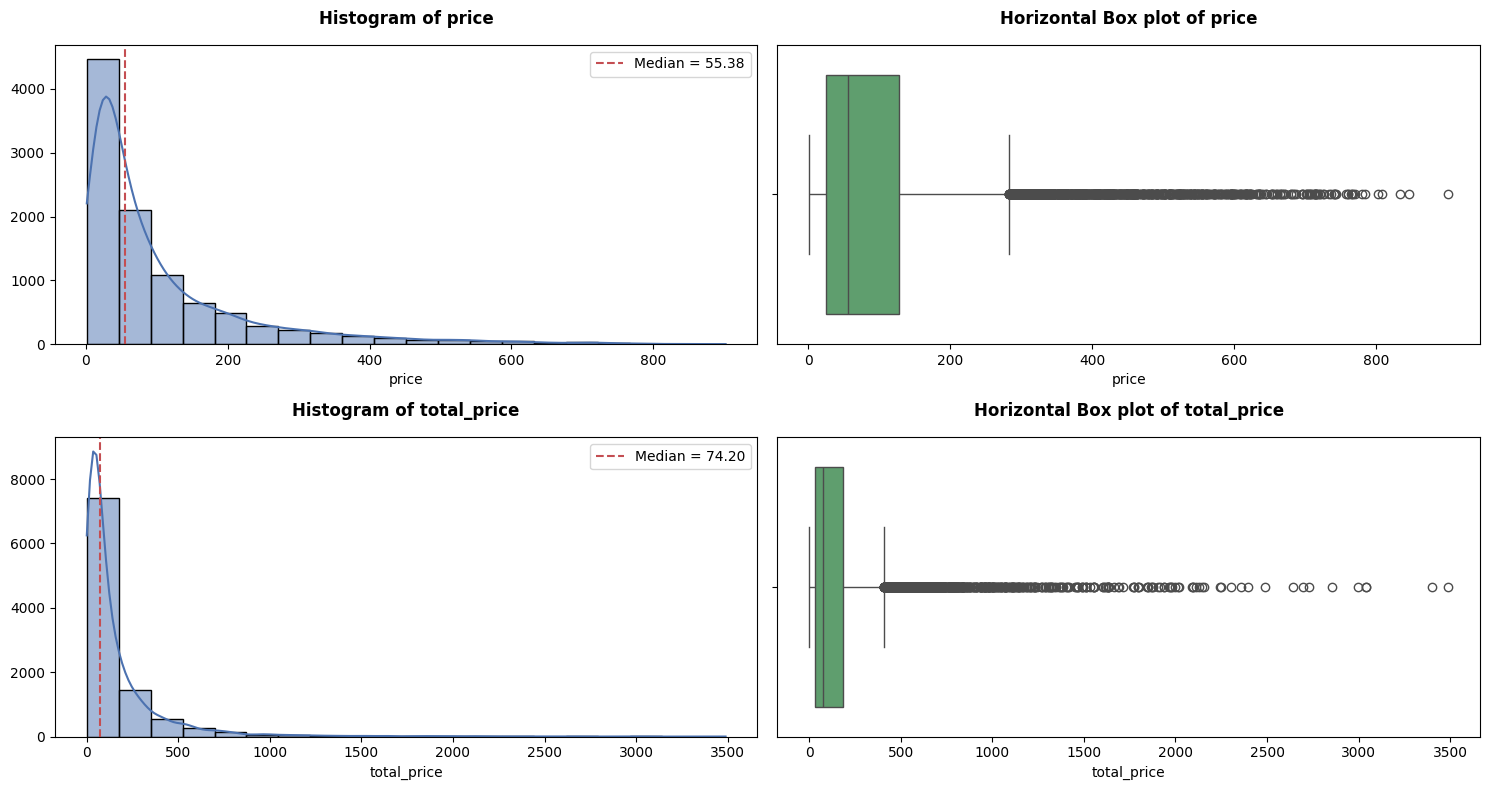

In [381]:
def plot_numerical_features(df=df, numerical_features = num_features):
    fig, ax = plt.subplots(len(numerical_features), 2, figsize=(15, len(numerical_features)*4))
    ax = np.atleast_2d(ax)

    for i, feature in enumerate(numerical_features):
        sns.histplot(data=df[feature], color="#4C72B0", bins = 20, kde=True, ax=ax[i, 0])
        ax[i, 0].set_title(f"Histogram of {feature}", weight="bold", fontsize=12, pad=15)
        ax[i, 0].set_ylabel("")
        ax[i, 0].axvline(df[feature].median(), color="#C44E52", linestyle="--", label=f"Median = {df[feature].median():.2f}")
        ax[i, 0].legend()

        sns.boxplot(data=df[feature], color="#55A868", orient="h", ax=ax[i, 1])
        ax[i, 1].set_title(f"Horizontal Box plot of {feature}", weight="bold", fontsize=12, pad=15)
        ax[i, 1].set_xlabel(feature)
    plt.tight_layout()
    plt.show()

plot_numerical_features()

In [382]:
def check_skewness(data=df, numerical_features=num_features, 
                   highlight=True, sort=True):
    """
    Calculate and display skewness for numerical features in a dataset.
    Optionally highlights highly skewed features and sorts the output.
    """

    # Dictionary to store skewness values
    skewness_dict = {}

    # List to collect features with strong skewness (for return)
    skew_feature = []

    # Compute skewness for each numerical feature
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    # Convert results to DataFrame
    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", 
                                     columns=["Skewness"])

    # Sort by absolute skewness if enabled
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs()
                                  .sort_values(ascending=False).index)

    # Print formatted skewness table
    print(f"\n[i] Skewness for dataset:")
    print("-" * 70)
    print(f"{'Feature':<30} | {'Skewness':<10} | {'Remark'}")
    print("-" * 70)

    # Iterate through features to print and classify skewness
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)

        # Categorize skewness level
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"      # Red for strong skewness
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"      # Yellow for moderate skewness
        else:
            remark = "Approximately symmetric"
            color = ""

        # End color formatting if applied
        endc = "\033[0m" if color else ""

        # Print with optional highlighting
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+10f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+10f} | {remark}")

    print("-" * 70)

    return skew_feature, skew_df

skew_feature, skew_df = check_skewness()


[i] Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
total_price                    |  +4.539101 | Highly skewed
price                          |  +2.333296 | Highly skewed
----------------------------------------------------------------------


**Insight**

* **total_price:** Highly right-skewed (+4.539101) → most total price are small, with a few large outliers.
* **price:** Moderately right-skewed (+2.333296) → similar **total_price**.

## Categorical Feature Distributions

In [383]:
def plot_categorical_distribution_across_datasets(
    df: pd.DataFrame = df,
    feature="gender"
):
    # --- Summarize categorical feature in training set ---
    summary = (
        df[feature]
        .value_counts()
        .rename_axis("Category")
        .reset_index(name="Count")
    )

    # Calculate percentage distribution in training data
    summary["Percentage_%"] = round((summary["Count"] / summary["Count"].sum() * 100), 2)

    # Convert summary table to HTML for better visualization in notebook
    html = summary.to_html(
        index=False,
        justify="center",
        classes="table table-striped table-hover",
    )

    # Display formatted HTML table with title
    display(HTML(f"<h4>[i] Categorical Feature Distribution: <b>{feature}</b></h4>" + html))
    print("*" * 80)

for feature in cat_features:
    plot_categorical_distribution_across_datasets(df, feature)

Category,Count,Percentage_%
Clothing,1859,18.59
Electronics,1462,14.62
Home,1430,14.30
Sports,1171,11.71
Grocery,1106,11.06
Toys,1027,10.27
Books,986,9.86
Beauty,959,9.59


********************************************************************************


Category,Count,Percentage_%
United States,2665,26.65
India,1631,16.31
United Kingdom,867,8.67
Germany,579,5.79
Canada,566,5.66
France,550,5.50
Brazil,536,5.36
Australia,433,4.33
Spain,427,4.27
Netherlands,422,4.22


********************************************************************************


Category,Count,Percentage_%
Low-Value,7003,70.03
Mid-Value,2313,23.13
High-Value,684,6.84


********************************************************************************


Category,Count,Percentage_%
1,7026,70.26
2,1474,14.74
3,797,7.97
4,376,3.76
5,327,3.27


********************************************************************************


## RFM Analysis

In [385]:
# Convert 2 date columns to datetime type.
df["order_date"] = pd.to_datetime(df["order_date"], format="mixed")

# Define the reference date = the latest order date + 1 day
# +1 day is added to avoid Recency = 0 for customers who ordered on the last day
recency_date = df["order_date"].max() + pd.Timedelta(days=1)

# Calculate RFM for each customer (user_id)
df_rfm = df.groupby("user_id").agg({
    # Recency = (reference date - most recent transaction date of the customer)
    "order_date": lambda x: (recency_date - x.max()).days,
    
    # Frequency = number of order (count unique TransactionID)
    "order_id": "nunique",
    
    # Monetary = total_price
    "total_price": "sum"
}).reset_index()

# Rename columns for better readability
df_rfm.columns = ["user_id", "recency", "frequency", "monetary"]

display(df_rfm.head())

,user_id,recency,frequency,monetary
0,1,33,1,778.12
1,2,692,5,2153.51
2,3,150,2,76.76
3,4,714,1,11.34
4,5,278,2,37.52


In [386]:
# Recency scoring: lower recency = better (more recent purchase)
def r_score(value, r_quartiles):
    if value >= r_quartiles[0.8]:
        return 1
    elif value >= r_quartiles[0.6]:
        return 2
    elif value >= r_quartiles[0.4]:
        return 3
    elif value >= r_quartiles[0.2]:
        return 4
    else:
        return 5

# Frequency scoring: higher frequency = better
def f_score(value, f_quartiles):
    if value >= f_quartiles[0.8]:
        return 5
    elif value >= f_quartiles[0.6]:
        return 4
    elif value >= f_quartiles[0.4]:
        return 3
    elif value >= f_quartiles[0.2]:
        return 2
    else:
        return 1
    
# Monetary scoring: higher monetary value = better
def m_score(value, m_quartiles):
    if value >= m_quartiles[0.8]:
        return 5
    elif value >= m_quartiles[0.6]:
        return 4
    elif value >= m_quartiles[0.4]:
        return 3
    elif value >= m_quartiles[0.2]:
        return 2
    else:
        return 1

# Compute quartiles for Recency, Frequency, Monetary
r_quartiles = df_rfm["recency"].quantile([0.2, 0.4, 0.6, 0.8])
f_quartiles = df_rfm["frequency"].quantile([0.2, 0.4, 0.6, 0.8])
m_quartiles = df_rfm["monetary"].quantile([0.2, 0.4, 0.6, 0.8])

# Apply scoring functions to each customer
df_rfm["r_score"] = df_rfm["recency"].apply(lambda x: r_score(x, r_quartiles))
df_rfm["f_score"] = df_rfm["frequency"].apply(lambda x: f_score(x, f_quartiles))
df_rfm["m_score"] = df_rfm["monetary"].apply(lambda x: m_score(x, m_quartiles)) 

# Combine R, F, M scores into a single RFM score as a string
df_rfm["rfm_score"] = (
    df_rfm["r_score"].astype(str) + 
    df_rfm["f_score"].astype(str) + 
    df_rfm["m_score"].astype(str)
)

display(df_rfm.head())

,user_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
0,1,33,1,778.12,5,1,4,514
1,2,692,5,2153.51,1,5,5,155
2,3,150,2,76.76,4,2,1,421
3,4,714,1,11.34,1,1,1,111
4,5,278,2,37.52,3,2,1,321


In [387]:
# define a function to assign segments based on the RFM scores
def rfm_segment(score):
    if score in ["555", "554", "545", "544", "545", "455", "445"]:
        return "Champions"
    elif score in ["543", "444", "435", "355", "354", "345", "344", "335"]:
        return "Loyal"
    elif score in ["553", "551", "552", "541", "542", "533", "532", "531", "452", "451", "442", "441", 
                   "431", "453", "433", "432", "423", "353", "352", "351", "342", "341", "333", "323"]:
        return "Potential Loyalist"
    elif score in ["525", "524", "523", "522", "521", "515", "514", "513", "425", "424", "413", "414", 
                   "415", "315", "314", "313"]:
        return "Promising"
    elif score in ["512", "511", "422", "421", "412", "411", "311"]:
        return "New Customers"
    elif score in ["535", "534", "443", "434", "343", "334", "325", "324"]:
        return "Need Attention"
    elif score in ["331", "321", "312", "221", "213", "231", "241", "251"]:
        return "About To Sleep"
    elif score in ["255", "254", "245", "244", "243", "252", "243", "242", "235", "234", "225", "224",
                   "153", "152", "145", "143", "142", "135", "134", "133", "125", "124"]:
        return "At Risk"
    elif score in ["155", "154", "144", "214", "215", "115", "114", "113"]:
        return "Cannot Lose Them"
    elif score in ["332", "322", "233", "232", "223", "222", "132", "123", "122", "212", "211"]:
        return "Hibernating Customers"
    elif score in ["111", "112", "121", "131", "141", "151"]:
        return "Lost Customers"
    else:
        return "Other"

df_rfm["rfm_segment"] = df_rfm["rfm_score"].apply(rfm_segment)
display(df_rfm.head())

,user_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,rfm_segment
0,1,33,1,778.12,5,1,4,514,Promising
1,2,692,5,2153.51,1,5,5,155,Cannot Lose Them
2,3,150,2,76.76,4,2,1,421,New Customers
3,4,714,1,11.34,1,1,1,111,Lost Customers
4,5,278,2,37.52,3,2,1,321,About To Sleep


In [388]:
# Create a styled RFM summary table grouped by RFM segments
summary_rfm = (
    df_rfm.groupby("rfm_segment").agg({
        "recency": ["mean", "min", "max"],     # Recency statistics
        "frequency": ["mean", "min", "max"],   # Frequency statistics
        "monetary": ["mean", "min", "max"],    # Monetary statistics
        "user_id": "count"                     # Number of customers in each segment
    })
    # Sort segments by highest average Monetary value
    .sort_values(("monetary", "mean"), ascending=False)
    
    # Convert DataFrame into a styled display object
    .style
    .set_caption("RFM Summary by Segment")     # Add a centered title
    .format(precision=0)                       # Round all numeric values to 0 decimals
    
    # Apply styling for table headers and caption
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center")]},  # Center-align column headers
        {"selector": "caption", 
         "props": [("caption-side", "top"), 
                   ("font-size", "16px"), 
                   ("font-weight", "bold")]}                      # Style caption/title
    ])
    
    # Apply general formatting to all cells
    .set_properties(**{
        "text-align": "center",
        "font-size": "12px"
    })
    
    # Apply color gradient to key metrics for visual emphasis
    .background_gradient(
        subset=[
            ("recency", "mean"),
            ("frequency", "mean"),
            ("monetary", "mean"),
            ("user_id", "count")
        ],
        cmap="Blues"
    )
)

# Display the styled summary table
display(summary_rfm)

In [389]:
df_rfm.head()

,user_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,rfm_segment
0,1,33,1,778.12,5,1,4,514,Promising
1,2,692,5,2153.51,1,5,5,155,Cannot Lose Them
2,3,150,2,76.76,4,2,1,421,New Customers
3,4,714,1,11.34,1,1,1,111,Lost Customers
4,5,278,2,37.52,3,2,1,321,About To Sleep


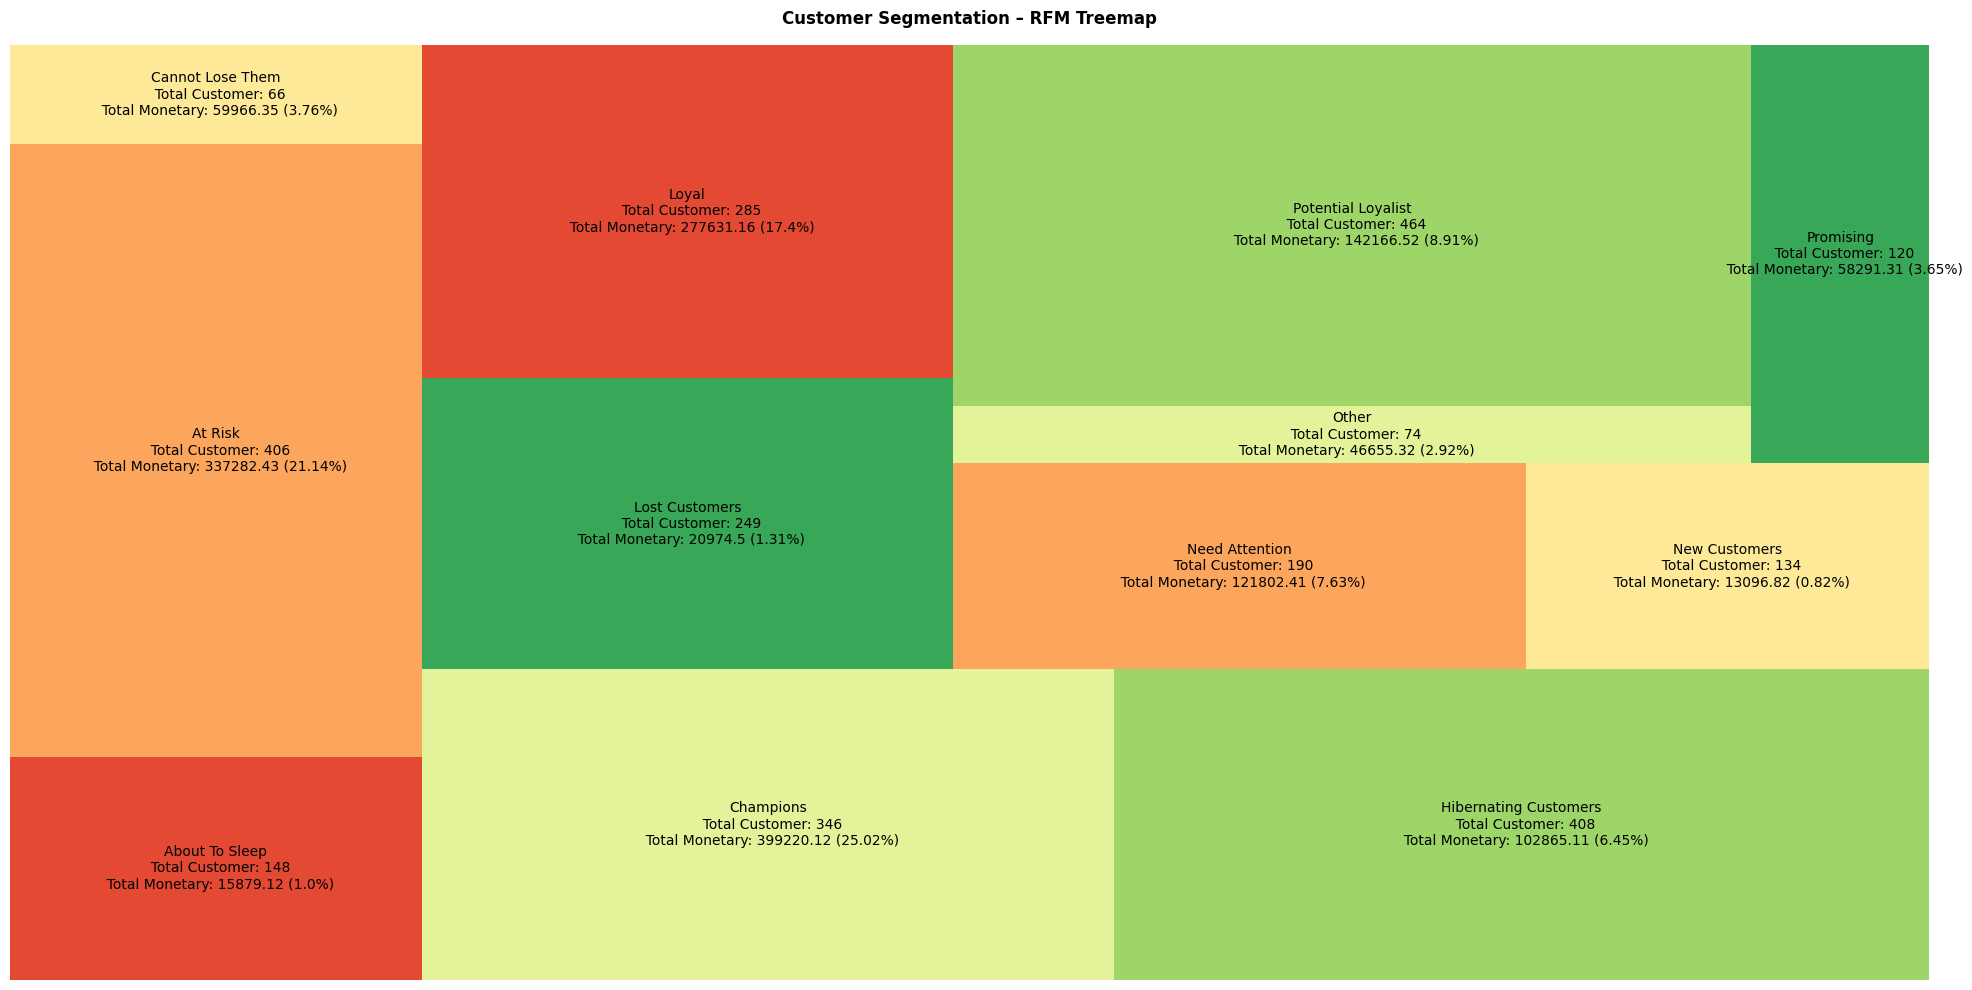

In [390]:
import squarify

# Ensure R, F, M scores are stored as small integers for efficiency
df_rfm = df_rfm.astype({
    "r_score": "int8",
    "f_score": "int8",
    "m_score": "int8"
})

# Aggregate RFM metrics by segment
rfm_summarised = (
    df_rfm.groupby(by="rfm_segment", as_index=False)
          .agg(
                customers_count=("user_id", "nunique"),   # Unique customers per segment
                total_monetary = ("monetary", "sum")      # Sum of Monetary
          )
)

# Calculate total monetary value across all segments
total_monetary_all = rfm_summarised["total_monetary"].sum()

# Calculate the percentage contribution of each segment to total monetary value
rfm_summarised["total_monetary_percent"] = round(
    (rfm_summarised["total_monetary"] / total_monetary_all) * 100, 2
)

# Create a treemap visualization of customer counts by RFM segment
plt.figure(figsize=(20, 10))

labels = (
    rfm_summarised["rfm_segment"] + "\n" +
    "  Total Customer: " + rfm_summarised["customers_count"].astype(str) + "\n" +
    "  Total Monetary: " + rfm_summarised["total_monetary"].astype(str) +
    " (" + rfm_summarised["total_monetary_percent"].astype(str) + "%)"
)

squarify.plot(
    sizes=rfm_summarised["customers_count"].to_list(),
    label=labels,
    color=color_(n_colors=df_rfm["rfm_segment"].nunique(), tone="RdYlGn")
)


plt.title("Customer Segmentation – RFM Treemap", fontsize=12, pad=15, weight="bold")
plt.axis("off")     # Remove axis for cleaner treemap
plt.tight_layout()
plt.show()

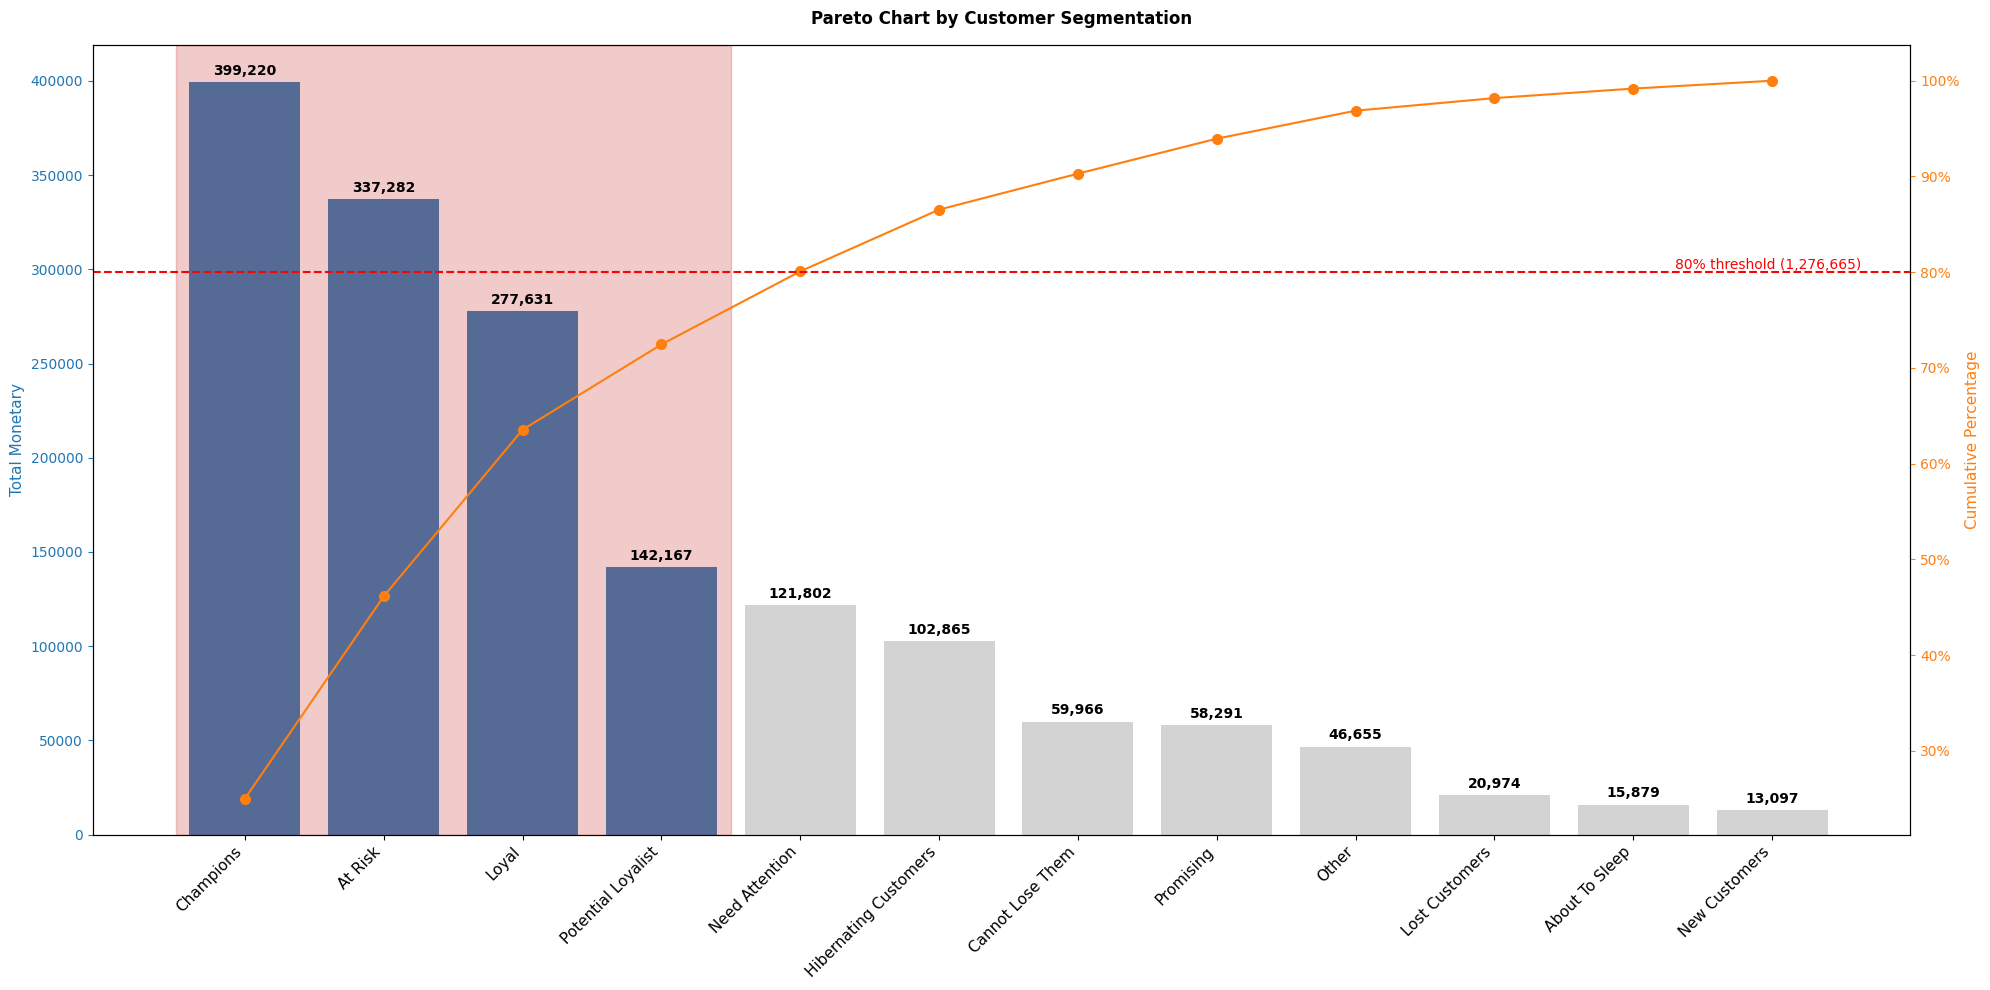

In [391]:
from matplotlib.ticker import PercentFormatter

# Sort by Monetary descending
rfm_summarised = rfm_summarised.sort_values(by="total_monetary", ascending=False).reset_index(drop=True)

# Compute cumulative %
rfm_summarised["cumpercentage"] = (
    rfm_summarised["total_monetary"].cumsum() /
    rfm_summarised["total_monetary"].sum() * 100
)

# Top 80% tagging
rfm_summarised["Top80"] = rfm_summarised["cumpercentage"] <= 80

# PARETO CHART
fig, ax = plt.subplots(figsize=(20, 10))

# Color bars (blue for Top80)
colors = ["#1f77b4" if x else "#d3d3d3" for x in rfm_summarised["Top80"]]
bars = ax.bar(
    rfm_summarised["rfm_segment"],
    rfm_summarised["total_monetary"],
    color=colors
)

# ⭐⭐ HIGHLIGHT BACKGROUND FOR TOP 80% ⭐⭐
cutoff_index = rfm_summarised[rfm_summarised["Top80"]].index.max()

ax.axvspan(
    -0.5,
    cutoff_index + 0.5,
    color="#d35252",
    alpha=0.3)

# Bar labels
ax.bar_label(
    bars,
    labels=[f"{v:,.0f}" for v in rfm_summarised["total_monetary"]],
    padding=3,
    fontsize=10,
    color="black",
    weight="bold"
)

# Cumulative line
ax1 = ax.twinx()
ax1.plot(
    rfm_summarised["rfm_segment"],
    rfm_summarised["cumpercentage"],
    color="#ff7f0e",
    marker="o",
    ms=7
)

ax1.yaxis.set_major_formatter(PercentFormatter())

# 80% threshold label
total_m_sum = rfm_summarised["total_monetary"].sum()
threshold_80_value = total_m_sum * 0.8

ax1.axhline(80, color="red", linestyle="--", linewidth=1.5)
ax1.text(
    len(rfm_summarised) * 0.97,
    80,
    f"80% threshold ({threshold_80_value:,.0f})",
    color="red",
    fontsize=10,
    ha="right",
    va="bottom"
)

# Styling
ax.set_ylabel("Total Monetary", color="C0", fontsize=11)
ax1.set_ylabel("Cumulative Percentage", color="#ff7f0e", fontsize=11)
ax.tick_params(axis="y", colors="C0")
ax1.tick_params(axis="y", colors="#ff7f0e")

plt.sca(ax)
plt.xticks(rotation=45, ha="right", fontsize=11)

plt.title("Pareto Chart by Customer Segmentation", fontsize=12, pad=15, weight="bold")

fig.tight_layout()
plt.show()


**Insight:**

* Revenue is highly concentrated: **Top 4 RFM segments contribute 80%+ of total revenue**.
* **Champions, At Risk, and Loyal** are the most valuable groups and should be prioritized.
* **At Risk** contributes heavily but is vulnerable — must be reactivated quickly.
* Lower-value groups (e.g., Need Attention, About To Sleep, Lost) have limited revenue impact and should receive cost-efficient nurturing strategies.

## Cohort Analysis

### Customer Retention

In [392]:
df_cohort = df.copy()

In [394]:
from operator import attrgetter

# order_date
df_cohort["cohort"] = df_cohort.groupby("user_id")["order_date"].transform("min").dt.to_period("M")
df_cohort["order_month"] = df_cohort["order_date"].dt.to_period("M")
# Create cohort dataframe
df_cohort = df_cohort.groupby(["cohort", "order_month"]).agg(n_customers=("user_id", "nunique")).reset_index(drop=False)

# period_number
df_cohort["period_number"] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter("n"))
display(df_cohort.head())

,cohort,order_month,n_customers,period_number
0,2022-01,2022-01,247,0
1,2022-01,2022-02,15,1
2,2022-01,2022-03,13,2
3,2022-01,2022-04,21,3
4,2022-01,2022-05,20,4


In [395]:
cohort_pivot = df_cohort.pivot_table(index="cohort", columns="period_number", values="n_customers")
display(cohort_pivot)

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
cohort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01,247.0,15.0,13.0,21.0,20.0,20.0,16.0,18.0,21.0,13.0,21.0,20.0,25.0,17.0,23.0,17.0,22.0,14.0,24.0,25.0,15.0,17.0,17.0,21.0,17.0,16.0,14.0,15.0,12.0,16.0,17.0,20.0,20.0,16.0,14.0,13.0,11.0,18.0,13.0,20.0,20.0,14.0,12.0,13.0
2022-02,160.0,15.0,21.0,21.0,14.0,14.0,14.0,11.0,10.0,5.0,7.0,12.0,12.0,14.0,11.0,10.0,11.0,10.0,6.0,13.0,13.0,8.0,12.0,9.0,17.0,17.0,10.0,10.0,12.0,12.0,9.0,12.0,23.0,8.0,13.0,8.0,10.0,19.0,7.0,11.0,11.0,17.0,2.0,NaN
2022-03,203.0,9.0,13.0,12.0,14.0,20.0,15.0,16.0,16.0,19.0,12.0,9.0,9.0,8.0,19.0,19.0,13.0,19.0,21.0,19.0,18.0,18.0,15.0,15.0,20.0,19.0,9.0,11.0,17.0,13.0,10.0,18.0,15.0,9.0,30.0,7.0,13.0,6.0,16.0,17.0,14.0,9.0,NaN,NaN
2022-04,183.0,17.0,12.0,11.0,8.0,13.0,18.0,16.0,16.0,13.0,10.0,16.0,19.0,19.0,14.0,16.0,19.0,17.0,10.0,18.0,3.0,21.0,14.0,15.0,17.0,15.0,12.0,12.0,16.0,15.0,12.0,12.0,12.0,7.0,8.0,13.0,14.0,15.0,10.0,15.0,6.0,NaN,NaN,NaN
2022-05,168.0,10.0,10.0,18.0,15.0,15.0,15.0,12.0,12.0,12.0,12.0,12.0,13.0,12.0,16.0,21.0,18.0,11.0,11.0,13.0,10.0,5.0,15.0,10.0,13.0,8.0,13.0,10.0,9.0,8.0,16.0,16.0,12.0,9.0,17.0,11.0,8.0,14.0,7.0,7.0,NaN,NaN,NaN,NaN
2022-06,166.0,18.0,11.0,9.0,5.0,14.0,16.0,16.0,15.0,12.0,10.0,6.0,9.0,9.0,14.0,11.0,12.0,14.0,14.0,7.0,10.0,7.0,11.0,13.0,11.0,12.0,15.0,15.0,9.0,14.0,12.0,17.0,10.0,12.0,14.0,12.0,14.0,14.0,2.0,NaN,NaN,NaN,NaN,NaN
2022-07,128.0,12.0,9.0,9.0,10.0,10.0,11.0,5.0,12.0,9.0,11.0,8.0,4.0,8.0,10.0,7.0,10.0,8.0,9.0,8.0,11.0,9.0,9.0,10.0,13.0,10.0,11.0,10.0,9.0,10.0,10.0,4.0,6.0,13.0,12.0,14.0,10.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-08,127.0,11.0,3.0,9.0,7.0,9.0,8.0,11.0,7.0,14.0,12.0,11.0,8.0,7.0,11.0,13.0,7.0,12.0,9.0,8.0,7.0,10.0,14.0,8.0,6.0,8.0,9.0,13.0,5.0,17.0,10.0,13.0,9.0,12.0,8.0,11.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,111.0,10.0,7.0,11.0,12.0,6.0,5.0,12.0,8.0,4.0,6.0,13.0,6.0,2.0,12.0,9.0,14.0,5.0,5.0,3.0,7.0,4.0,12.0,6.0,4.0,10.0,9.0,7.0,13.0,10.0,8.0,12.0,10.0,7.0,11.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


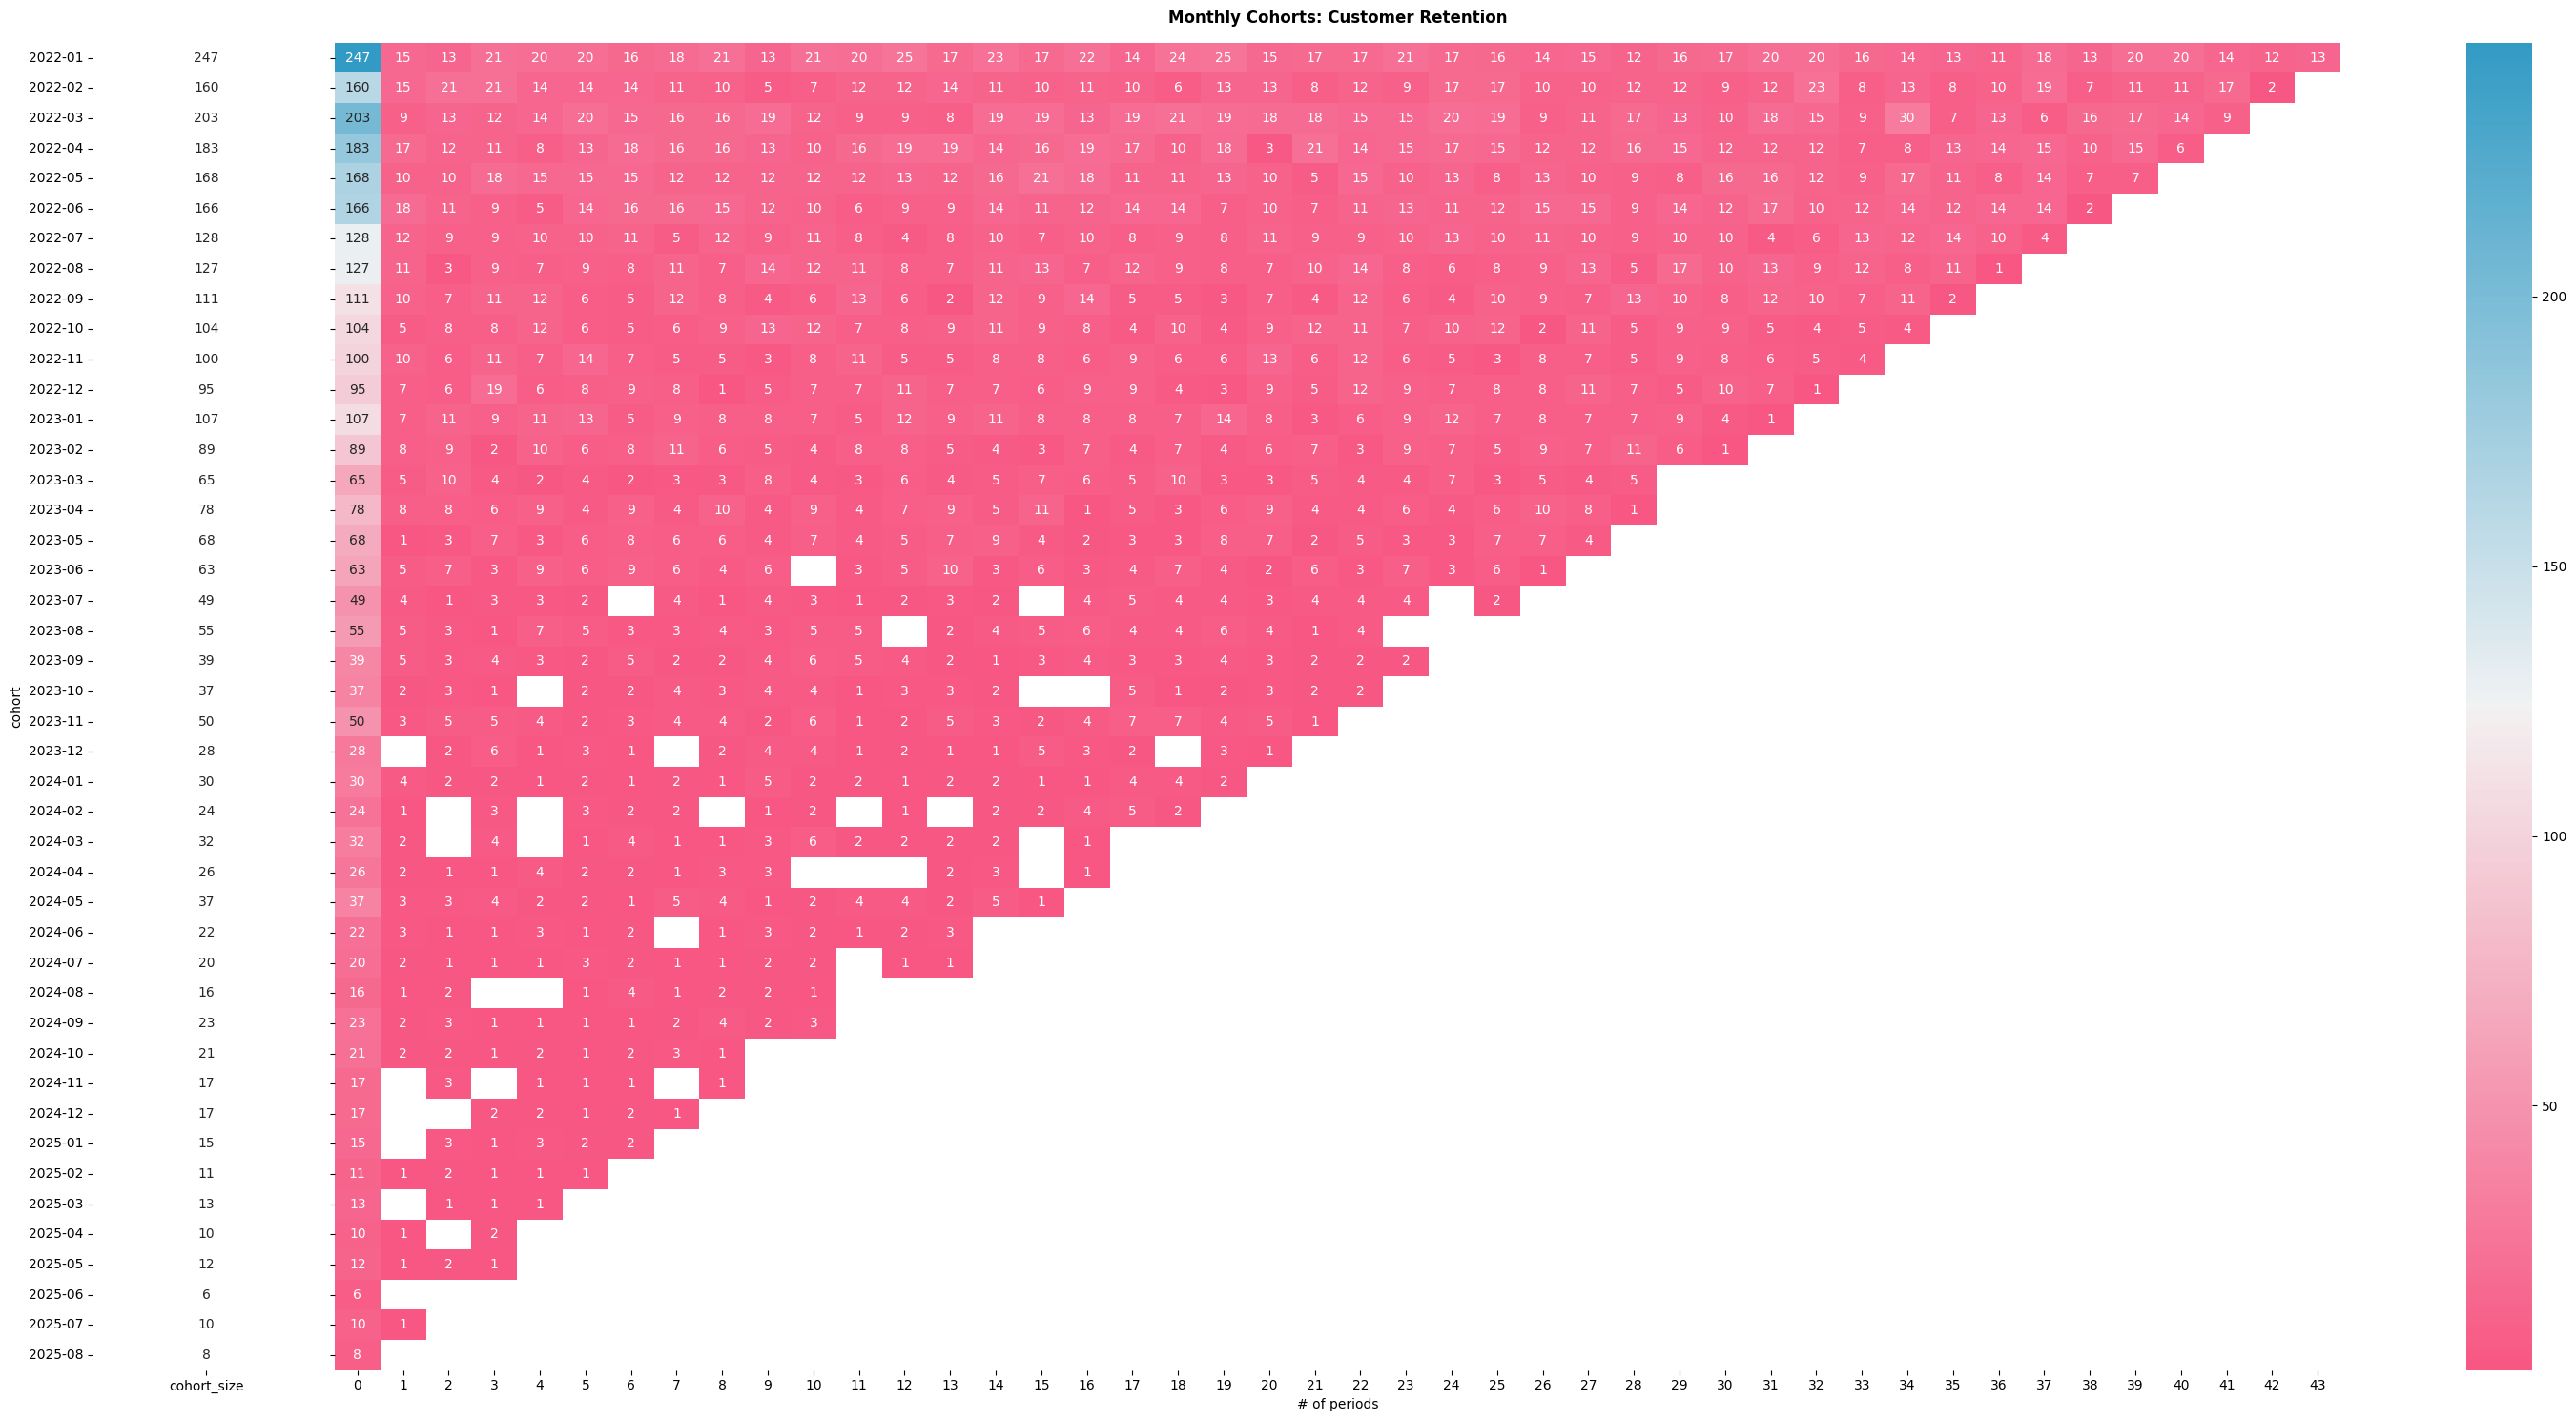

In [396]:
import matplotlib.colors as mcolors

cohort_size = cohort_pivot.iloc[:, 0]
fig, ax = plt.subplots(1, 2, figsize=(30, 15), sharey=True, gridspec_kw={"width_ratios": [1, 11]})
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# retention matrix
sns.heatmap(cohort_pivot, mask=cohort_pivot.isnull(), annot=True, fmt=".0f", cmap=cmap, ax=ax[1])
ax[1].set_title("Monthly Cohorts: Customer Retention", fontsize=12, pad=15, weight="bold")
ax[1].set(xlabel="# of periods", ylabel="")

# cohort size
cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"})
white_cmap = mcolors.ListedColormap(["white"])
sns.heatmap(cohort_size_df, annot=True, cbar=False, fmt="g", cmap=white_cmap, ax=ax[0])

plt.tight_layout()
plt.show()

In [397]:
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
cohort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01,1.0,0.060729,0.052632,0.085020,0.080972,0.080972,0.064777,0.072874,0.085020,0.052632,0.085020,0.080972,0.101215,0.068826,0.093117,0.068826,0.089069,0.056680,0.097166,0.101215,0.060729,0.068826,0.068826,0.085020,0.068826,0.064777,0.056680,0.060729,0.048583,0.064777,0.068826,0.080972,0.080972,0.064777,0.056680,0.052632,0.044534,0.072874,0.052632,0.080972,0.080972,0.056680,0.048583,0.052632
2022-02,1.0,0.093750,0.131250,0.131250,0.087500,0.087500,0.087500,0.068750,0.062500,0.031250,0.043750,0.075000,0.075000,0.087500,0.068750,0.062500,0.068750,0.062500,0.037500,0.081250,0.081250,0.050000,0.075000,0.056250,0.106250,0.106250,0.062500,0.062500,0.075000,0.075000,0.056250,0.075000,0.143750,0.050000,0.081250,0.050000,0.062500,0.118750,0.043750,0.068750,0.068750,0.106250,0.012500,NaN
2022-03,1.0,0.044335,0.064039,0.059113,0.068966,0.098522,0.073892,0.078818,0.078818,0.093596,0.059113,0.044335,0.044335,0.039409,0.093596,0.093596,0.064039,0.093596,0.103448,0.093596,0.088670,0.088670,0.073892,0.073892,0.098522,0.093596,0.044335,0.054187,0.083744,0.064039,0.049261,0.088670,0.073892,0.044335,0.147783,0.034483,0.064039,0.029557,0.078818,0.083744,0.068966,0.044335,NaN,NaN
2022-04,1.0,0.092896,0.065574,0.060109,0.043716,0.071038,0.098361,0.087432,0.087432,0.071038,0.054645,0.087432,0.103825,0.103825,0.076503,0.087432,0.103825,0.092896,0.054645,0.098361,0.016393,0.114754,0.076503,0.081967,0.092896,0.081967,0.065574,0.065574,0.087432,0.081967,0.065574,0.065574,0.065574,0.038251,0.043716,0.071038,0.076503,0.081967,0.054645,0.081967,0.032787,NaN,NaN,NaN
2022-05,1.0,0.059524,0.059524,0.107143,0.089286,0.089286,0.089286,0.071429,0.071429,0.071429,0.071429,0.071429,0.077381,0.071429,0.095238,0.125000,0.107143,0.065476,0.065476,0.077381,0.059524,0.029762,0.089286,0.059524,0.077381,0.047619,0.077381,0.059524,0.053571,0.047619,0.095238,0.095238,0.071429,0.053571,0.101190,0.065476,0.047619,0.083333,0.041667,0.041667,NaN,NaN,NaN,NaN
2022-06,1.0,0.108434,0.066265,0.054217,0.030120,0.084337,0.096386,0.096386,0.090361,0.072289,0.060241,0.036145,0.054217,0.054217,0.084337,0.066265,0.072289,0.084337,0.084337,0.042169,0.060241,0.042169,0.066265,0.078313,0.066265,0.072289,0.090361,0.090361,0.054217,0.084337,0.072289,0.102410,0.060241,0.072289,0.084337,0.072289,0.084337,0.084337,0.012048,NaN,NaN,NaN,NaN,NaN
2022-07,1.0,0.093750,0.070312,0.070312,0.078125,0.078125,0.085938,0.039062,0.093750,0.070312,0.085938,0.062500,0.031250,0.062500,0.078125,0.054688,0.078125,0.062500,0.070312,0.062500,0.085938,0.070312,0.070312,0.078125,0.101562,0.078125,0.085938,0.078125,0.070312,0.078125,0.078125,0.031250,0.046875,0.101562,0.093750,0.109375,0.078125,0.031250,NaN,NaN,NaN,NaN,NaN,NaN
2022-08,1.0,0.086614,0.023622,0.070866,0.055118,0.070866,0.062992,0.086614,0.055118,0.110236,0.094488,0.086614,0.062992,0.055118,0.086614,0.102362,0.055118,0.094488,0.070866,0.062992,0.055118,0.078740,0.110236,0.062992,0.047244,0.062992,0.070866,0.102362,0.039370,0.133858,0.078740,0.102362,0.070866,0.094488,0.062992,0.086614,0.007874,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,1.0,0.090090,0.063063,0.099099,0.108108,0.054054,0.045045,0.108108,0.072072,0.036036,0.054054,0.117117,0.054054,0.018018,0.108108,0.081081,0.126126,0.045045,0.045045,0.027027,0.063063,0.036036,0.108108,0.054054,0.036036,0.090090,0.081081,0.063063,0.117117,0.090090,0.072072,0.108108,0.090090,0.063063,0.099099,0.018018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


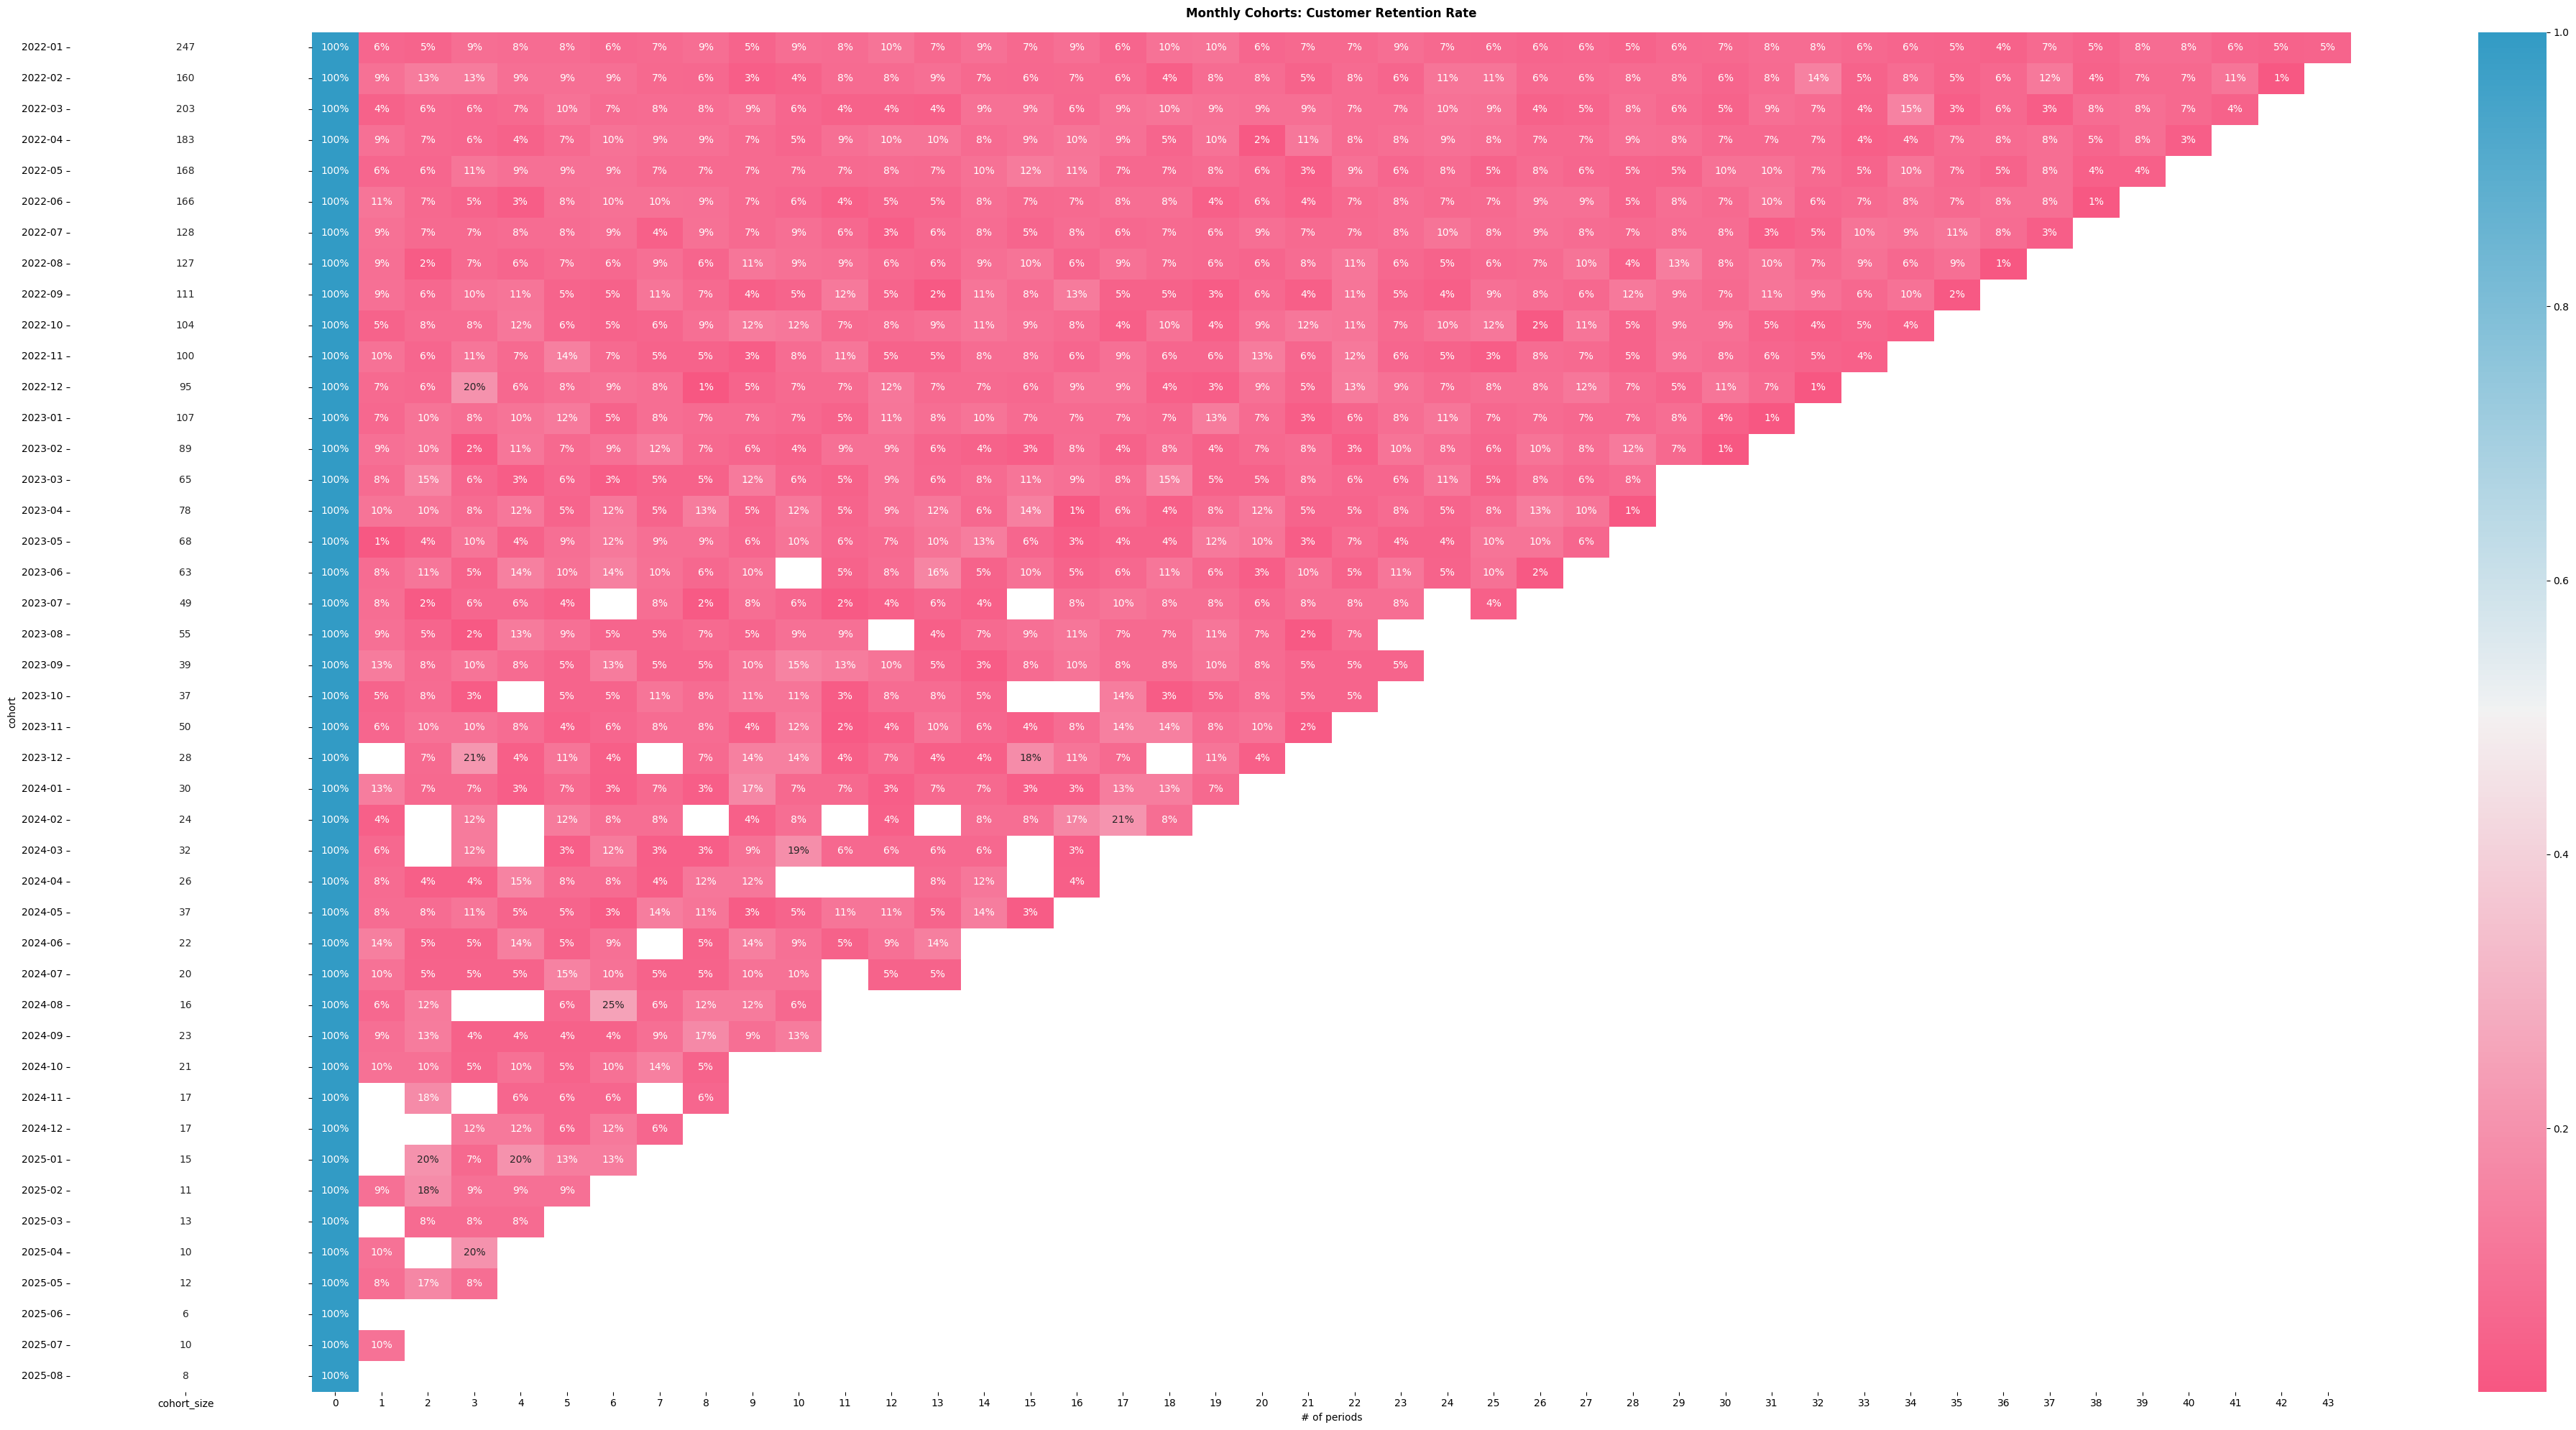

In [398]:
fig, ax = plt.subplots(1, 2, figsize=(40, 20), sharey=True, gridspec_kw={"width_ratios": [1, 11]})
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# retention matrix
sns.heatmap(retention_matrix, mask=retention_matrix.isnull(), annot=True, fmt=".0%", cmap=cmap, ax=ax[1])
ax[1].set_title("Monthly Cohorts: Customer Retention Rate", fontsize=12, pad=15, weight="bold")
ax[1].set(xlabel="# of periods", ylabel="")

# cohort size
cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"})
white_cmap = mcolors.ListedColormap(["white"])
sns.heatmap(cohort_size_df, annot=True, cbar=False, fmt="g", cmap=white_cmap, ax=ax[0])

plt.tight_layout()
plt.show()

### Customer Churn

In [399]:
base = cohort_pivot[0]
n_customer_churn = cohort_pivot.apply(lambda col: base - col, axis=0)
n_customer_churn[0] = base
n_customer_churn

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
cohort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01,247.0,232.0,234.0,226.0,227.0,227.0,231.0,229.0,226.0,234.0,226.0,227.0,222.0,230.0,224.0,230.0,225.0,233.0,223.0,222.0,232.0,230.0,230.0,226.0,230.0,231.0,233.0,232.0,235.0,231.0,230.0,227.0,227.0,231.0,233.0,234.0,236.0,229.0,234.0,227.0,227.0,233.0,235.0,234.0
2022-02,160.0,145.0,139.0,139.0,146.0,146.0,146.0,149.0,150.0,155.0,153.0,148.0,148.0,146.0,149.0,150.0,149.0,150.0,154.0,147.0,147.0,152.0,148.0,151.0,143.0,143.0,150.0,150.0,148.0,148.0,151.0,148.0,137.0,152.0,147.0,152.0,150.0,141.0,153.0,149.0,149.0,143.0,158.0,NaN
2022-03,203.0,194.0,190.0,191.0,189.0,183.0,188.0,187.0,187.0,184.0,191.0,194.0,194.0,195.0,184.0,184.0,190.0,184.0,182.0,184.0,185.0,185.0,188.0,188.0,183.0,184.0,194.0,192.0,186.0,190.0,193.0,185.0,188.0,194.0,173.0,196.0,190.0,197.0,187.0,186.0,189.0,194.0,NaN,NaN
2022-04,183.0,166.0,171.0,172.0,175.0,170.0,165.0,167.0,167.0,170.0,173.0,167.0,164.0,164.0,169.0,167.0,164.0,166.0,173.0,165.0,180.0,162.0,169.0,168.0,166.0,168.0,171.0,171.0,167.0,168.0,171.0,171.0,171.0,176.0,175.0,170.0,169.0,168.0,173.0,168.0,177.0,NaN,NaN,NaN
2022-05,168.0,158.0,158.0,150.0,153.0,153.0,153.0,156.0,156.0,156.0,156.0,156.0,155.0,156.0,152.0,147.0,150.0,157.0,157.0,155.0,158.0,163.0,153.0,158.0,155.0,160.0,155.0,158.0,159.0,160.0,152.0,152.0,156.0,159.0,151.0,157.0,160.0,154.0,161.0,161.0,NaN,NaN,NaN,NaN
2022-06,166.0,148.0,155.0,157.0,161.0,152.0,150.0,150.0,151.0,154.0,156.0,160.0,157.0,157.0,152.0,155.0,154.0,152.0,152.0,159.0,156.0,159.0,155.0,153.0,155.0,154.0,151.0,151.0,157.0,152.0,154.0,149.0,156.0,154.0,152.0,154.0,152.0,152.0,164.0,NaN,NaN,NaN,NaN,NaN
2022-07,128.0,116.0,119.0,119.0,118.0,118.0,117.0,123.0,116.0,119.0,117.0,120.0,124.0,120.0,118.0,121.0,118.0,120.0,119.0,120.0,117.0,119.0,119.0,118.0,115.0,118.0,117.0,118.0,119.0,118.0,118.0,124.0,122.0,115.0,116.0,114.0,118.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-08,127.0,116.0,124.0,118.0,120.0,118.0,119.0,116.0,120.0,113.0,115.0,116.0,119.0,120.0,116.0,114.0,120.0,115.0,118.0,119.0,120.0,117.0,113.0,119.0,121.0,119.0,118.0,114.0,122.0,110.0,117.0,114.0,118.0,115.0,119.0,116.0,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,111.0,101.0,104.0,100.0,99.0,105.0,106.0,99.0,103.0,107.0,105.0,98.0,105.0,109.0,99.0,102.0,97.0,106.0,106.0,108.0,104.0,107.0,99.0,105.0,107.0,101.0,102.0,104.0,98.0,101.0,103.0,99.0,101.0,104.0,100.0,109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


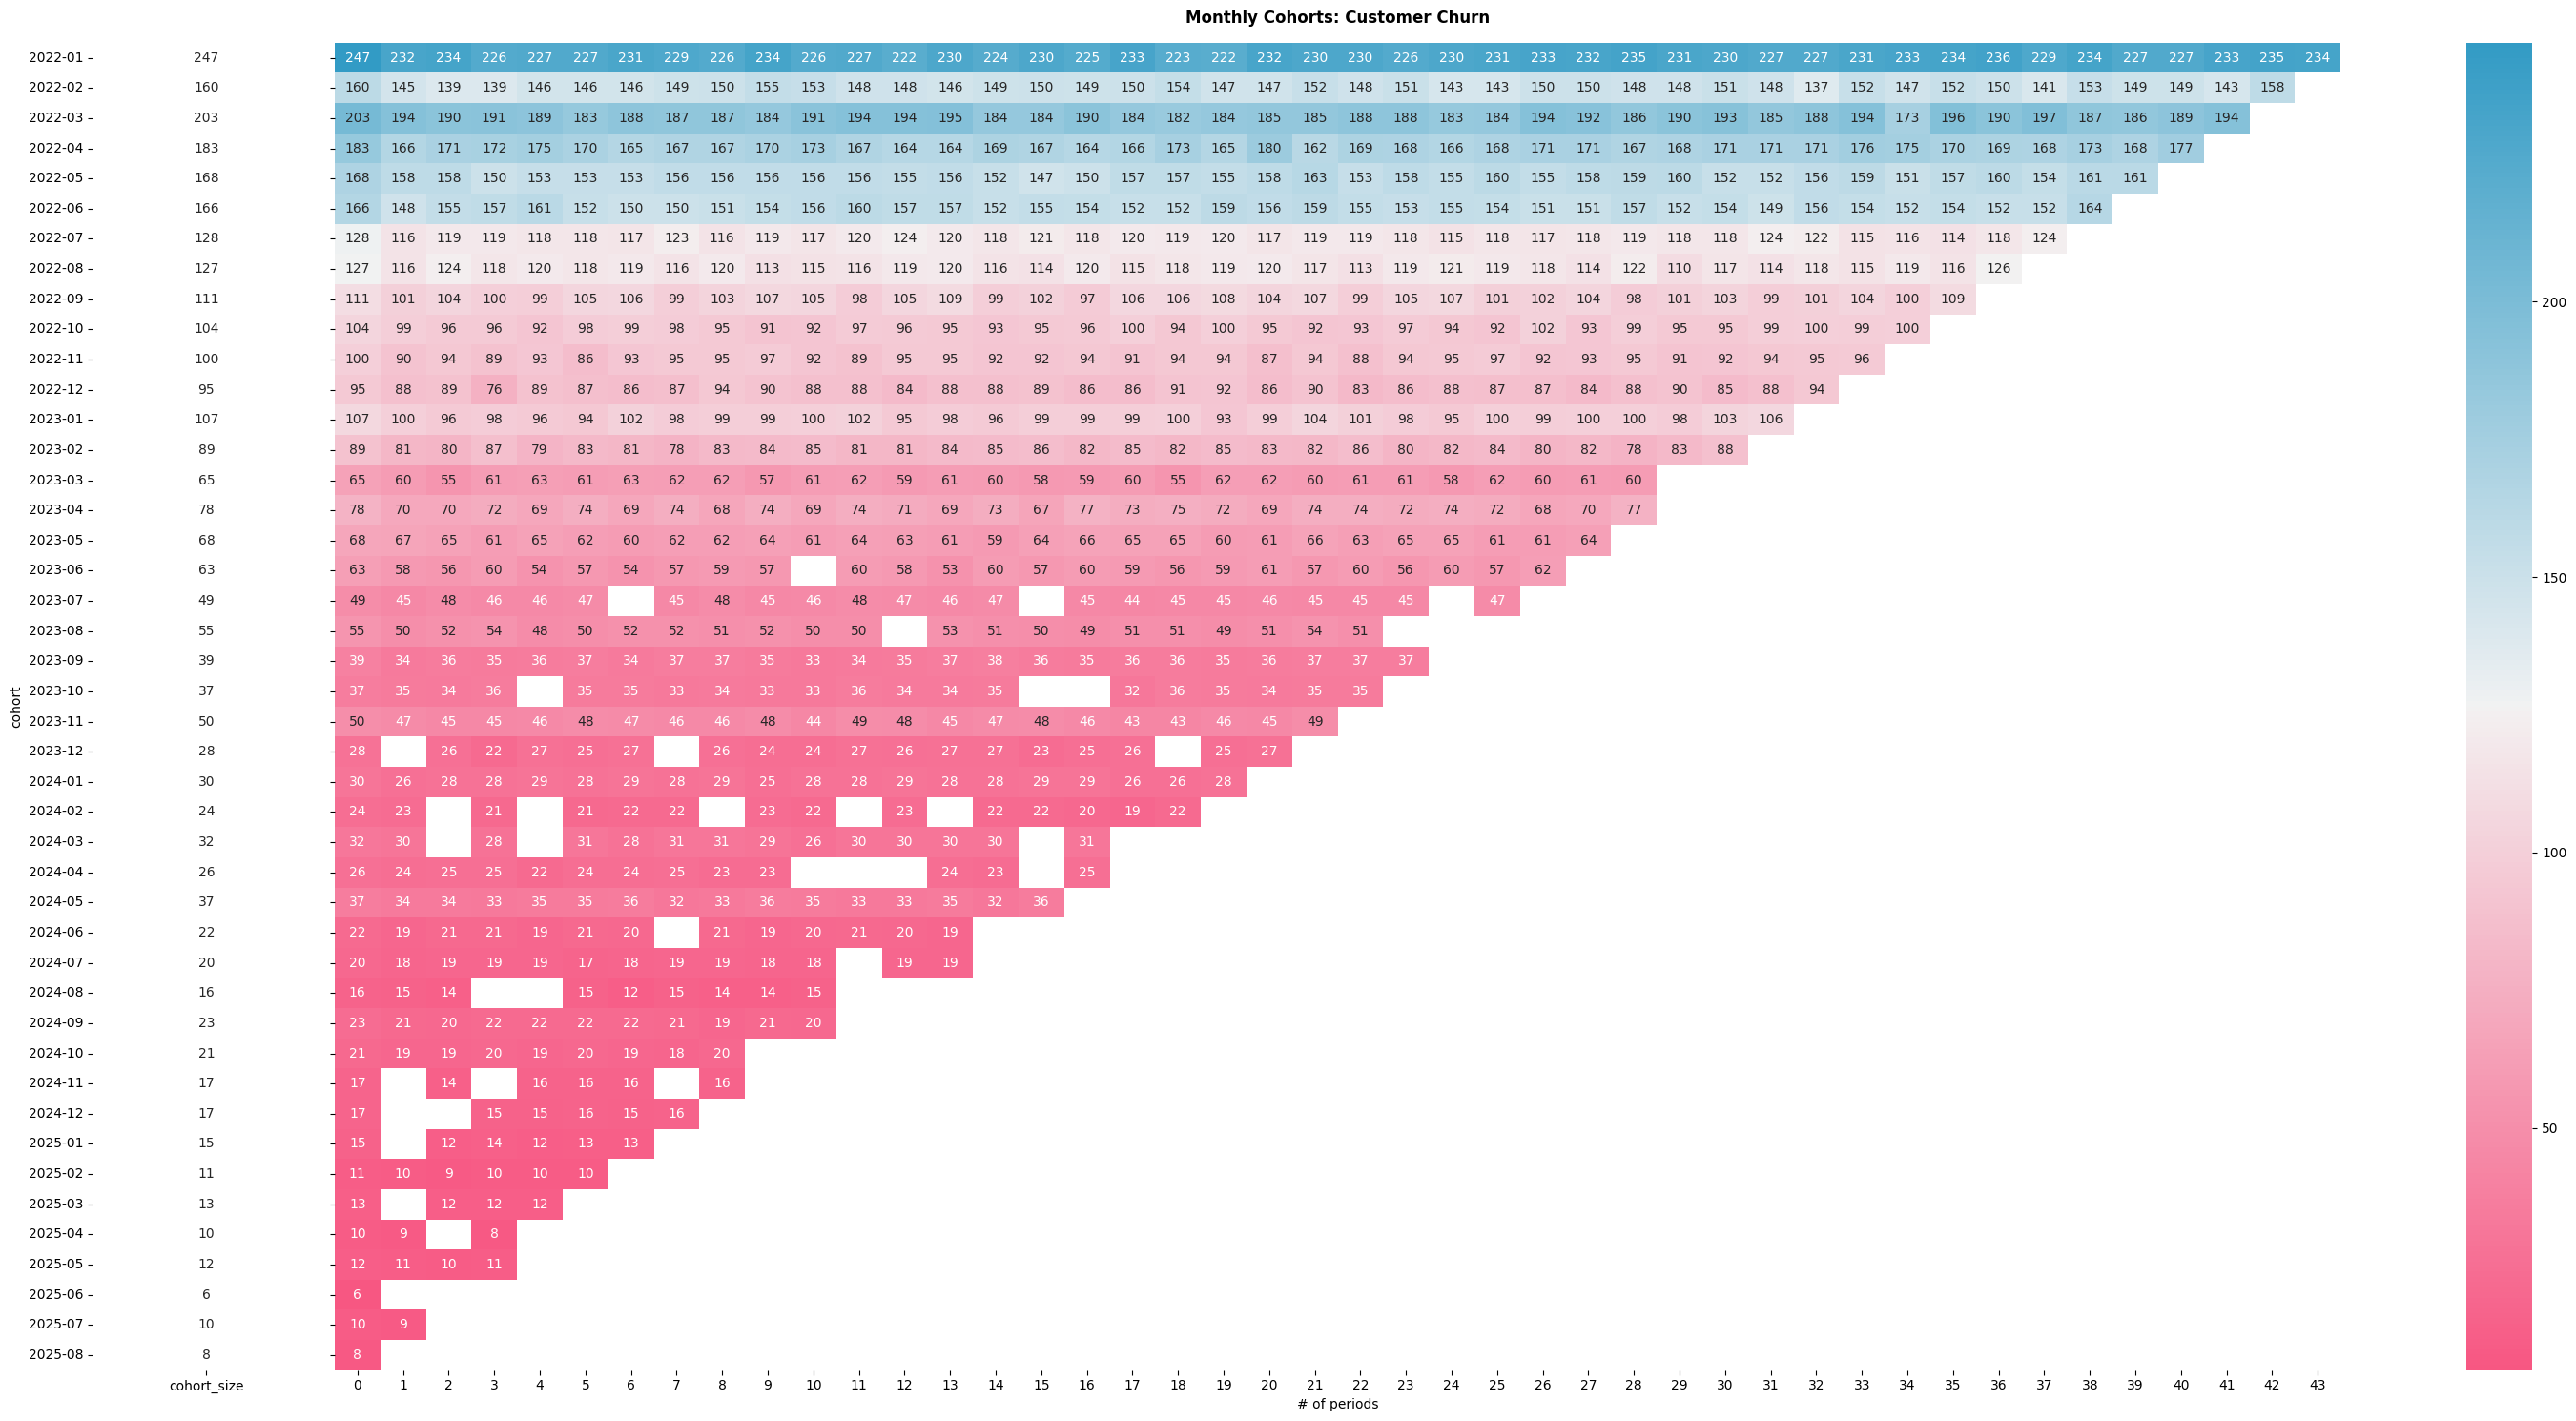

In [400]:
cohort_size_churn = n_customer_churn.iloc[:, 0]
fig, ax = plt.subplots(1, 2, figsize=(30, 15), sharey=True, gridspec_kw={"width_ratios": [1, 11]})
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# retention matrix
sns.heatmap(n_customer_churn, mask=n_customer_churn.isnull(), annot=True, fmt=".0f", cmap=cmap, ax=ax[1])
ax[1].set_title("Monthly Cohorts: Customer Churn", fontsize=12, pad=15, weight="bold")
ax[1].set(xlabel="# of periods", ylabel="")

# cohort size
cohort_size_df = pd.DataFrame(cohort_size_churn).rename(columns={0: "cohort_size"})
white_cmap = mcolors.ListedColormap(["white"])
sns.heatmap(cohort_size_df, annot=True, cbar=False, fmt="g", cmap=white_cmap, ax=ax[0])

plt.tight_layout()
plt.show()

In [401]:
churn_rate_matrix = n_customer_churn.divide(cohort_size_churn, axis=0)
churn_rate_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
cohort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01,1.0,0.939271,0.947368,0.914980,0.919028,0.919028,0.935223,0.927126,0.914980,0.947368,0.914980,0.919028,0.898785,0.931174,0.906883,0.931174,0.910931,0.943320,0.902834,0.898785,0.939271,0.931174,0.931174,0.914980,0.931174,0.935223,0.943320,0.939271,0.951417,0.935223,0.931174,0.919028,0.919028,0.935223,0.943320,0.947368,0.955466,0.927126,0.947368,0.919028,0.919028,0.943320,0.951417,0.947368
2022-02,1.0,0.906250,0.868750,0.868750,0.912500,0.912500,0.912500,0.931250,0.937500,0.968750,0.956250,0.925000,0.925000,0.912500,0.931250,0.937500,0.931250,0.937500,0.962500,0.918750,0.918750,0.950000,0.925000,0.943750,0.893750,0.893750,0.937500,0.937500,0.925000,0.925000,0.943750,0.925000,0.856250,0.950000,0.918750,0.950000,0.937500,0.881250,0.956250,0.931250,0.931250,0.893750,0.987500,NaN
2022-03,1.0,0.955665,0.935961,0.940887,0.931034,0.901478,0.926108,0.921182,0.921182,0.906404,0.940887,0.955665,0.955665,0.960591,0.906404,0.906404,0.935961,0.906404,0.896552,0.906404,0.911330,0.911330,0.926108,0.926108,0.901478,0.906404,0.955665,0.945813,0.916256,0.935961,0.950739,0.911330,0.926108,0.955665,0.852217,0.965517,0.935961,0.970443,0.921182,0.916256,0.931034,0.955665,NaN,NaN
2022-04,1.0,0.907104,0.934426,0.939891,0.956284,0.928962,0.901639,0.912568,0.912568,0.928962,0.945355,0.912568,0.896175,0.896175,0.923497,0.912568,0.896175,0.907104,0.945355,0.901639,0.983607,0.885246,0.923497,0.918033,0.907104,0.918033,0.934426,0.934426,0.912568,0.918033,0.934426,0.934426,0.934426,0.961749,0.956284,0.928962,0.923497,0.918033,0.945355,0.918033,0.967213,NaN,NaN,NaN
2022-05,1.0,0.940476,0.940476,0.892857,0.910714,0.910714,0.910714,0.928571,0.928571,0.928571,0.928571,0.928571,0.922619,0.928571,0.904762,0.875000,0.892857,0.934524,0.934524,0.922619,0.940476,0.970238,0.910714,0.940476,0.922619,0.952381,0.922619,0.940476,0.946429,0.952381,0.904762,0.904762,0.928571,0.946429,0.898810,0.934524,0.952381,0.916667,0.958333,0.958333,NaN,NaN,NaN,NaN
2022-06,1.0,0.891566,0.933735,0.945783,0.969880,0.915663,0.903614,0.903614,0.909639,0.927711,0.939759,0.963855,0.945783,0.945783,0.915663,0.933735,0.927711,0.915663,0.915663,0.957831,0.939759,0.957831,0.933735,0.921687,0.933735,0.927711,0.909639,0.909639,0.945783,0.915663,0.927711,0.897590,0.939759,0.927711,0.915663,0.927711,0.915663,0.915663,0.987952,NaN,NaN,NaN,NaN,NaN
2022-07,1.0,0.906250,0.929688,0.929688,0.921875,0.921875,0.914062,0.960938,0.906250,0.929688,0.914062,0.937500,0.968750,0.937500,0.921875,0.945312,0.921875,0.937500,0.929688,0.937500,0.914062,0.929688,0.929688,0.921875,0.898438,0.921875,0.914062,0.921875,0.929688,0.921875,0.921875,0.968750,0.953125,0.898438,0.906250,0.890625,0.921875,0.968750,NaN,NaN,NaN,NaN,NaN,NaN
2022-08,1.0,0.913386,0.976378,0.929134,0.944882,0.929134,0.937008,0.913386,0.944882,0.889764,0.905512,0.913386,0.937008,0.944882,0.913386,0.897638,0.944882,0.905512,0.929134,0.937008,0.944882,0.921260,0.889764,0.937008,0.952756,0.937008,0.929134,0.897638,0.960630,0.866142,0.921260,0.897638,0.929134,0.905512,0.937008,0.913386,0.992126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,1.0,0.909910,0.936937,0.900901,0.891892,0.945946,0.954955,0.891892,0.927928,0.963964,0.945946,0.882883,0.945946,0.981982,0.891892,0.918919,0.873874,0.954955,0.954955,0.972973,0.936937,0.963964,0.891892,0.945946,0.963964,0.909910,0.918919,0.936937,0.882883,0.909910,0.927928,0.891892,0.909910,0.936937,0.900901,0.981982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


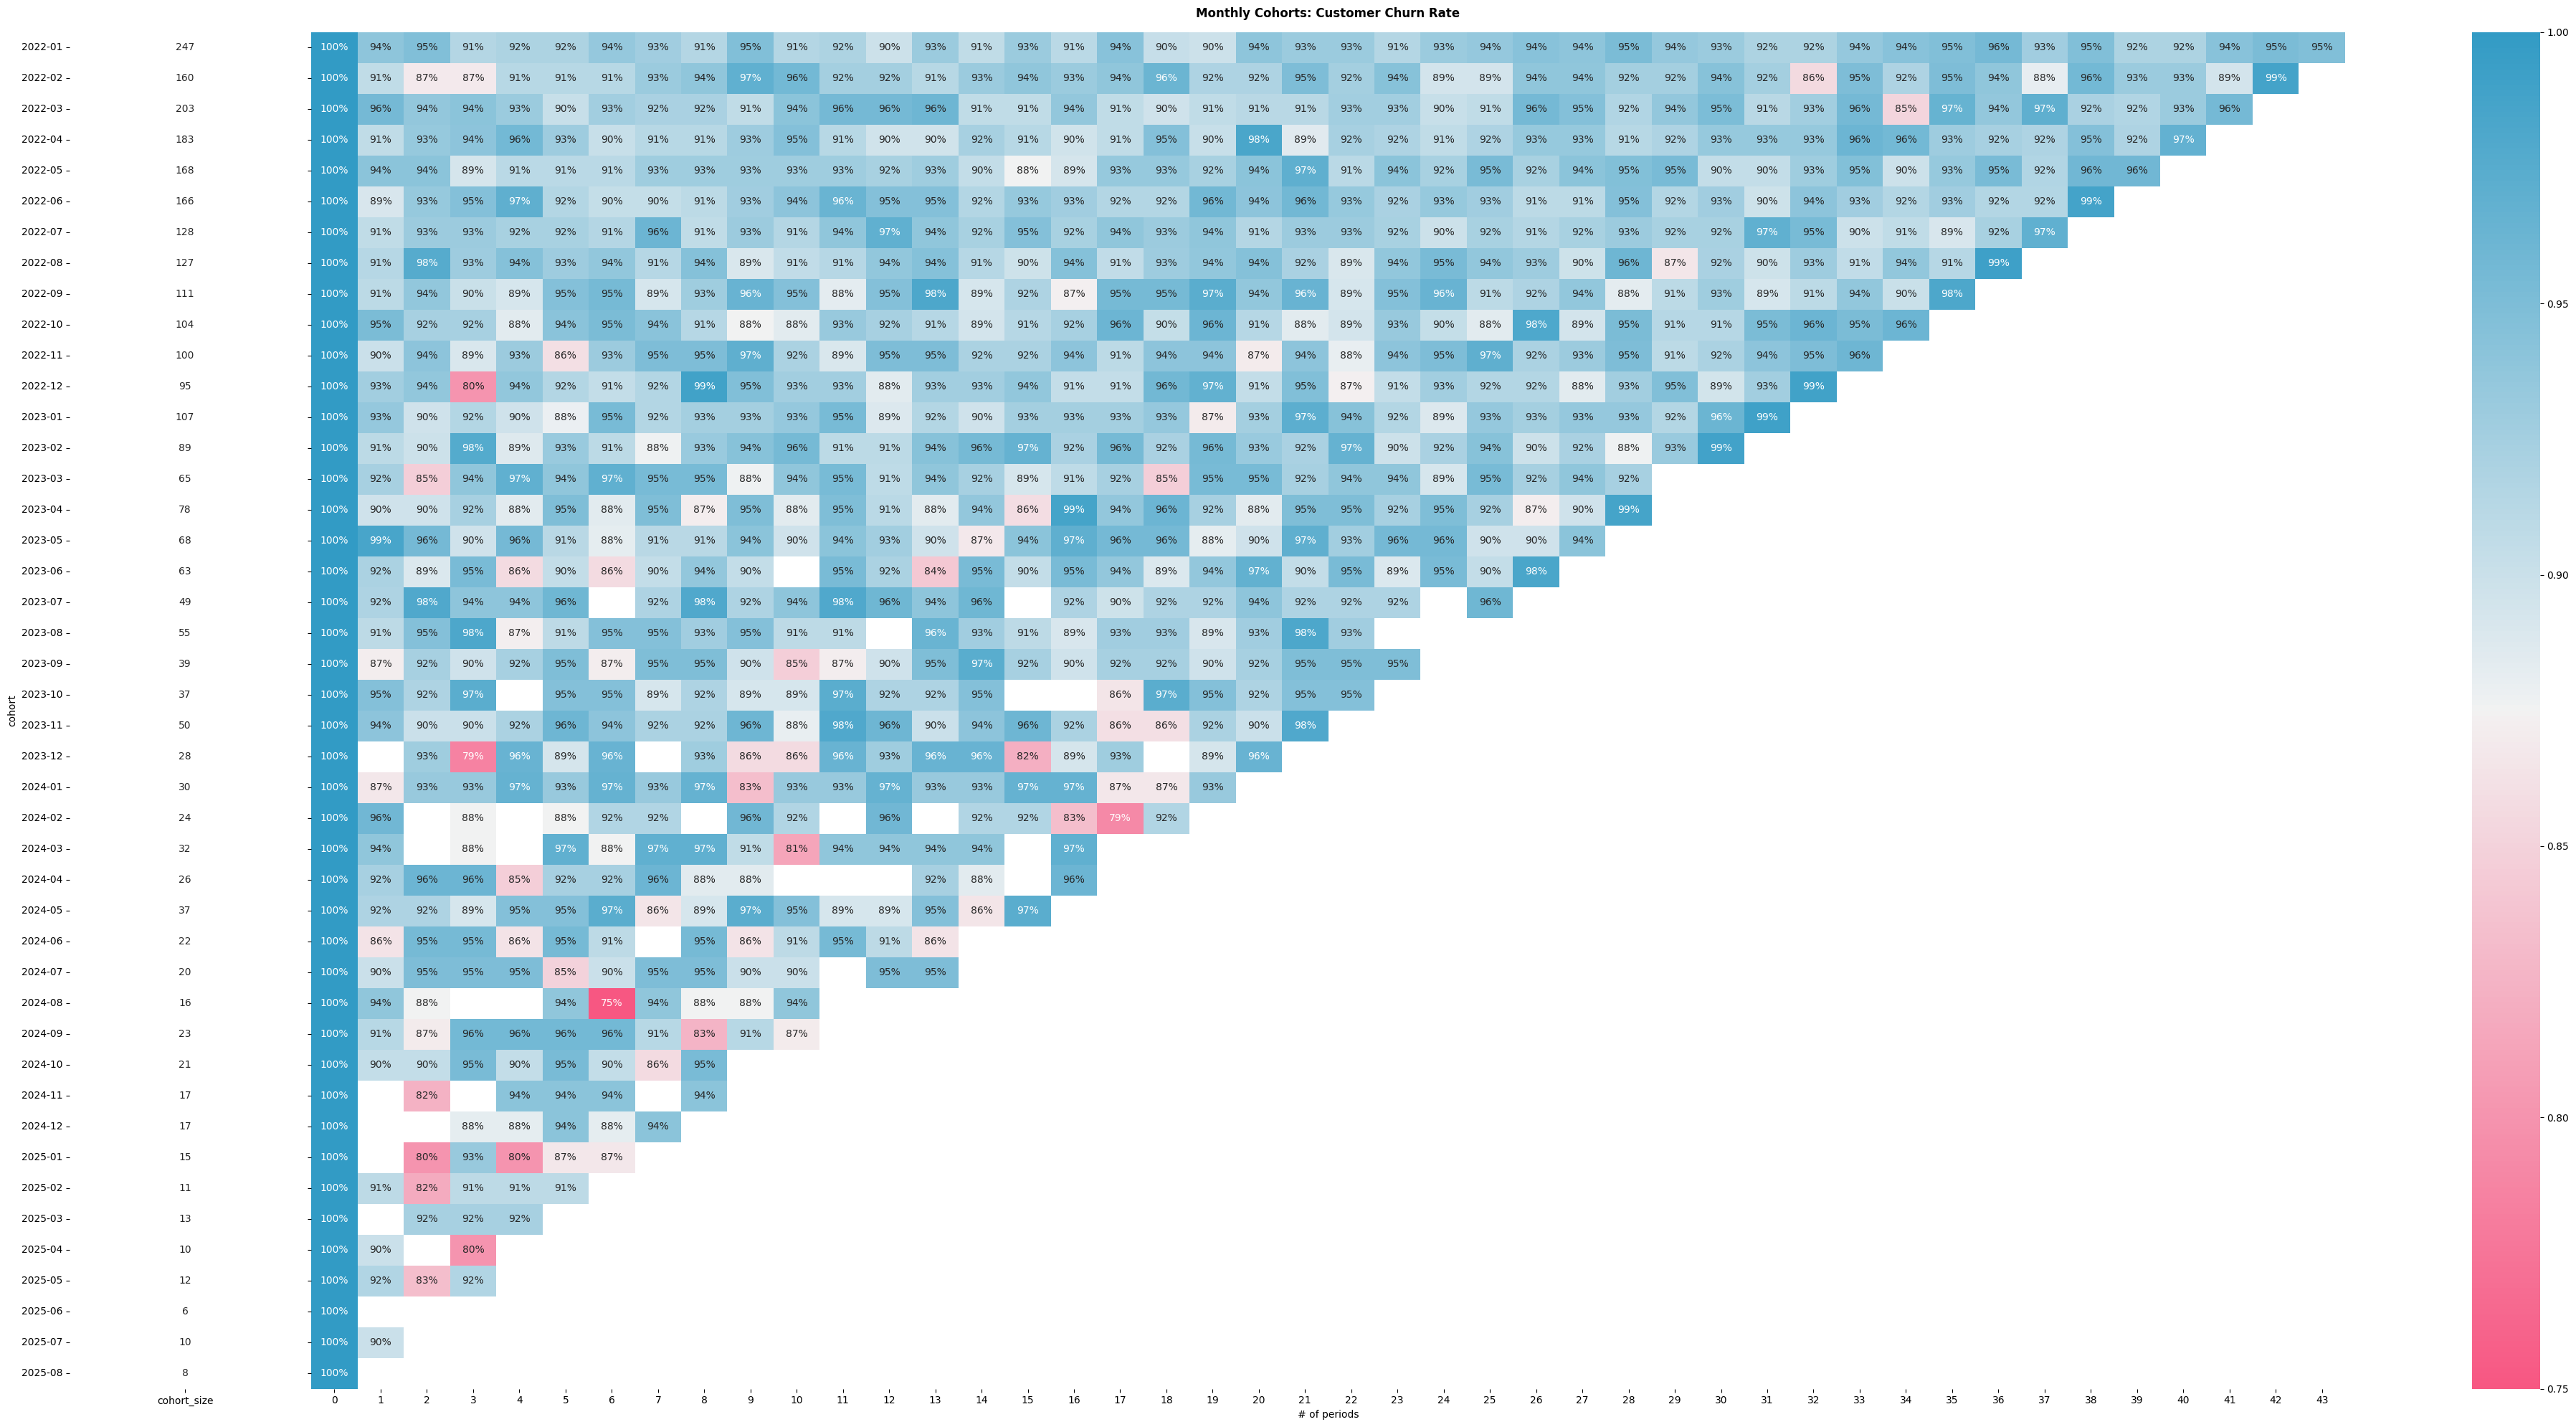

In [402]:
fig, ax = plt.subplots(1, 2, figsize=(40, 20), sharey=True, gridspec_kw={"width_ratios": [1, 11]})
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# retention matrix
sns.heatmap(churn_rate_matrix, mask=churn_rate_matrix.isnull(), annot=True, fmt=".0%", cmap=cmap, ax=ax[1])
ax[1].set_title("Monthly Cohorts: Customer Churn Rate", fontsize=12, pad=15, weight="bold")
ax[1].set(xlabel="# of periods", ylabel="")

# cohort size
cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"})
white_cmap = mcolors.ListedColormap(["white"])
sns.heatmap(cohort_size_df, annot=True, cbar=False, fmt="g", cmap=white_cmap, ax=ax[0])

plt.tight_layout()
plt.show()

**Insight:**

* Retention is weakening across newer cohorts.
* Most customers churn within the first 1–3 months.
* Cohorts from 2022 perform significantly better than 2023–2024.
* High churn rates (85%+) indicate dependency on one-time buyers and lack of post-purchase nurturing.

## QoQ Analysis

,quarter,total_price,account_count,qoq_growth,qoq_growth_label
0,2022Q1,107006.70,610,NaN,–
1,2022Q2,113391.78,654,5.97,+5.97%
2,2022Q3,106283.20,598,-6.27,-6.27%
3,2022Q4,101191.77,603,-4.79,-4.79%
4,2023Q1,125930.44,646,24.45,+24.45%
5,2023Q2,118296.26,644,-6.06,-6.06%
6,2023Q3,112663.42,623,-4.76,-4.76%
7,2023Q4,111361.69,623,-1.16,-1.16%
8,2024Q1,120854.80,608,8.52,+8.52%
9,2024Q2,93769.40,577,-22.41,-22.41%


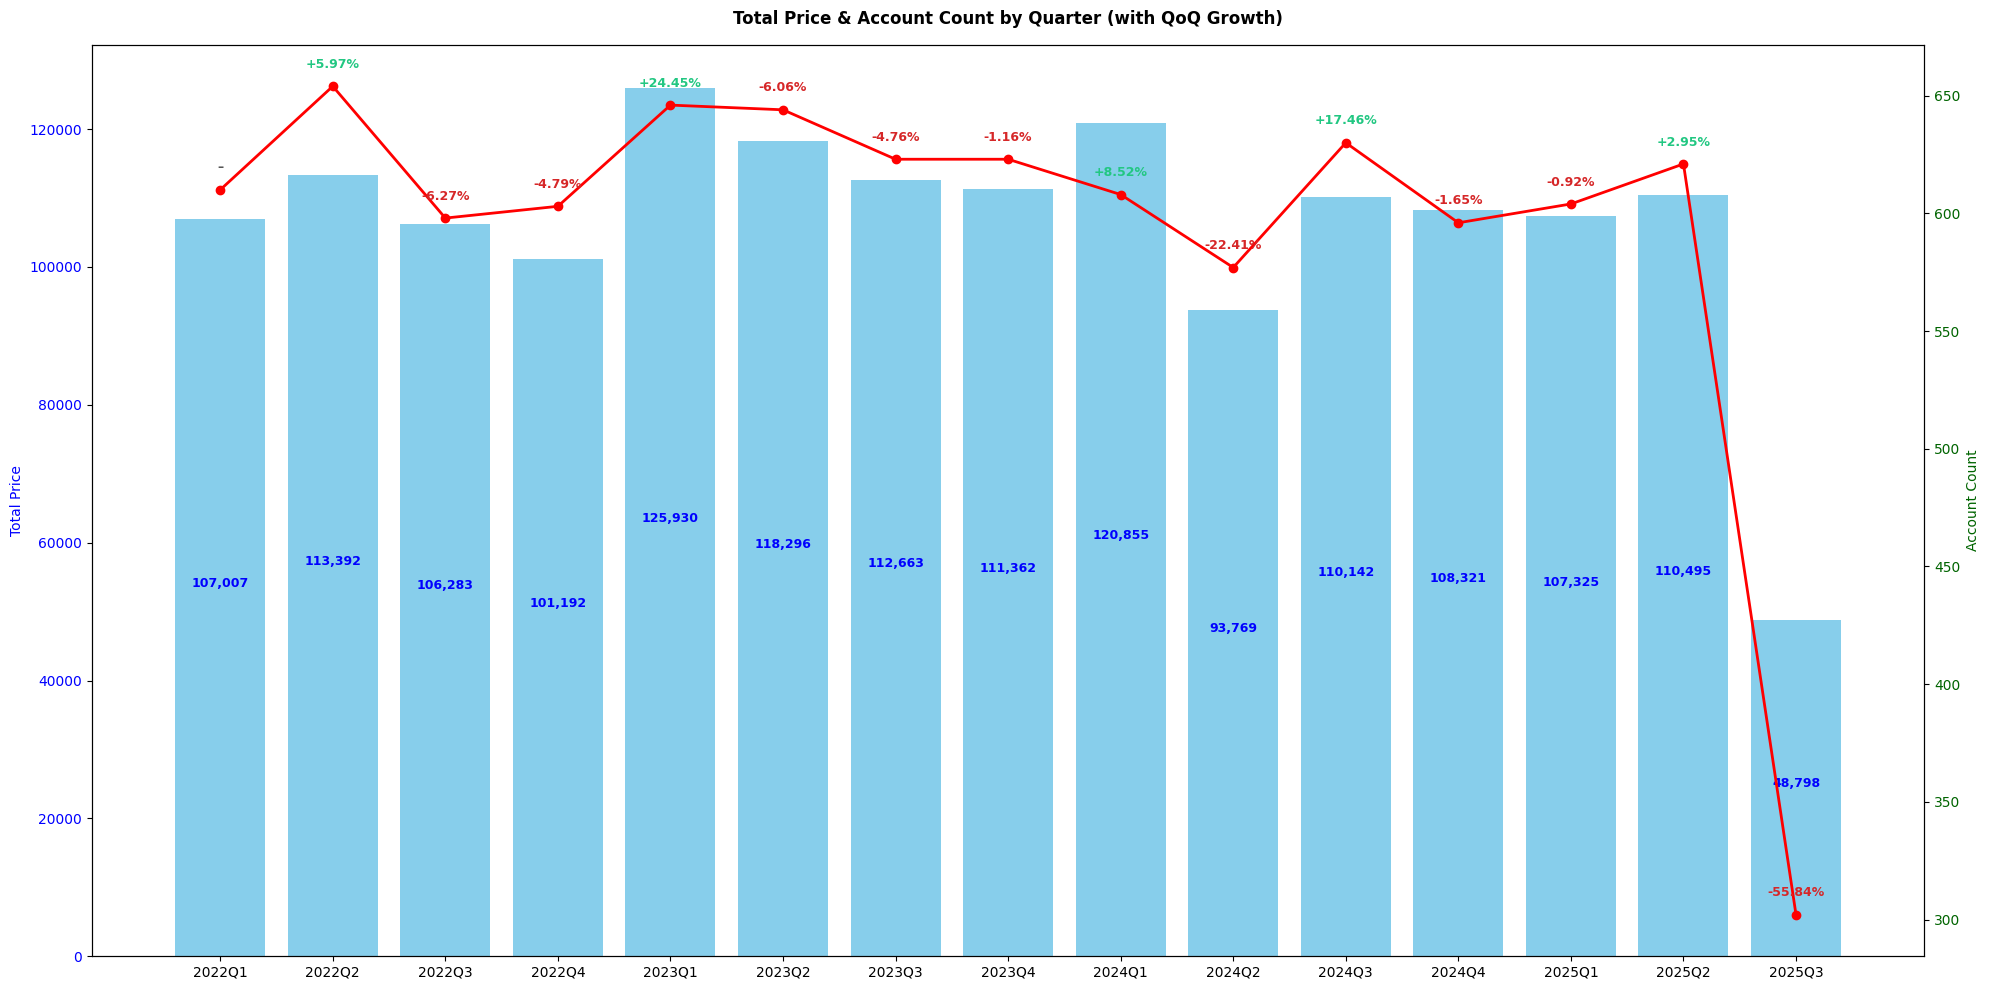

In [404]:
# Extract quarter period (e.g., 2020Q1) from order_date
df["quarter"] = (
    df["order_date"]
    .dt.to_period("Q")
    .astype(str)
)

# Aggregate quarterly total_price and number of unique accounts
quarterly_summary = df.groupby("quarter").agg(
    total_price=("total_price", "sum"),               # total_price per quarter
    account_count=("user_id", "nunique")              # Number of unique accounts per quarter
).reset_index()

# Calculate quarter-over-quarter (QoQ) total_price growth
quarterly_summary["qoq_growth"] = (
    quarterly_summary["total_price"].pct_change() * 100
)

# Round growth values for cleaner display
quarterly_summary["qoq_growth"] = quarterly_summary["qoq_growth"].round(2)

# Create a label: add "+" for positive growth, keep "–" for NaN (first row)
quarterly_summary["qoq_growth_label"] = quarterly_summary["qoq_growth"].apply(
    lambda x: f"+{x}%" if pd.notnull(x) and x > 0 
    else (f"{x}%" if pd.notnull(x) else "–")
)

# Display the first few rows for validation
display(quarterly_summary)

# Plot the chart
fig, ax1 = plt.subplots(figsize=(20, 10))

# Total Price bars
bars = ax1.bar(quarterly_summary["quarter"], quarterly_summary["total_price"],
               color="skyblue", label="Total Price")
ax1.set_ylabel("Total Price", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Add value labels on top of each bar
ax1.bar_label(bars, labels=[f"{v:,.0f}" for v in quarterly_summary["total_price"]],
              padding=3, fontsize=9, color="blue", label_type="center", weight="bold")

# Secondary axis for line chart (Account Count)
ax2 = ax1.twinx()
ax2.plot(quarterly_summary["quarter"], quarterly_summary["account_count"], color="red",
         marker="o", linewidth=2, label="Account Count")
ax2.set_ylabel("Account Count", color="darkgreen")
ax2.tick_params(axis="y", labelcolor="darkgreen")

# --- ADD QoQ LABELS WITH COLOR BASED ON POSITIVE/NEGATIVE GROWTH ---
y_offset = max(quarterly_summary["account_count"]) * 0.01

for x, y, growth, label in zip(
    quarterly_summary["quarter"],
    quarterly_summary["account_count"],
    quarterly_summary["qoq_growth"],
    quarterly_summary["qoq_growth_label"]
):
    # Determine color
    if pd.isna(growth):
        color = "#555555"         # first quarter = neutral gray
    elif growth > 0:
        color = "#22c782"         # positive = blue
    else:
        color = "#d62728"         # negative = red

    ax2.text(
        x,
        y + y_offset,
        label,
        color=color,
        fontsize=9,
        ha="center",
        va="bottom",
        weight="bold"
    )

# Add title and format axes
plt.title("Total Price & Account Count by Quarter (with QoQ Growth)", fontsize=12, fontweight="bold", pad=15)
fig.tight_layout()
plt.show()

**Insight:**

* Revenue is mostly stable with occasional **strong growth peaks**, but also **sharp declines** in recent quarters.
* Customer activity remains relatively consistent, except for a major drop in **2025Q3**.
* The decline in both revenue and account count signals **recent weakening customer engagement**, requiring deeper investigation or corrective action.

## CLV Analysis

> **CLV = Total profit a customer generates during their relationship with the company.**
> It measures **long-term customer value** and helps optimize **marketing spend, retention, and growth strategy.**

$$
CLV = (Average Purchase Value × Gross Margin) × Purchase Frequency × Lifespan
$$

* **Average Purchase Value × Gross Margin:** Profit per purchase
* **Purchase Frequency:** How often customers buy (e.g., times per year)
* **Lifespan:** Average years a customer stays active
* **Interpretation:** Total lifetime profit from an average customer.

In [406]:
# Compute average purchase value (APV), purchase frequency, and lifespan
clv_df = df.groupby("user_id").agg(
    total_price=("total_price", "sum"),
    num_order=("order_id", "nunique"),
    first_order=("order_date", "min"),
    last_order=("order_date", "max")
).reset_index()

display(clv_df.head())

,user_id,total_price,num_order,first_order,last_order
0,1,778.12,1,2025-07-10 09:43:00,2025-07-10 09:43:00
1,2,2153.51,5,2022-05-14 12:11:00,2023-09-20 20:37:00
2,3,76.76,2,2025-02-16 12:11:00,2025-03-15 04:22:00
3,4,11.34,1,2023-08-29 16:53:00,2023-08-29 16:53:00
4,5,37.52,2,2022-05-23 22:23:00,2024-11-07 10:26:00


[✓] Average CLV across all customers: 4132.38


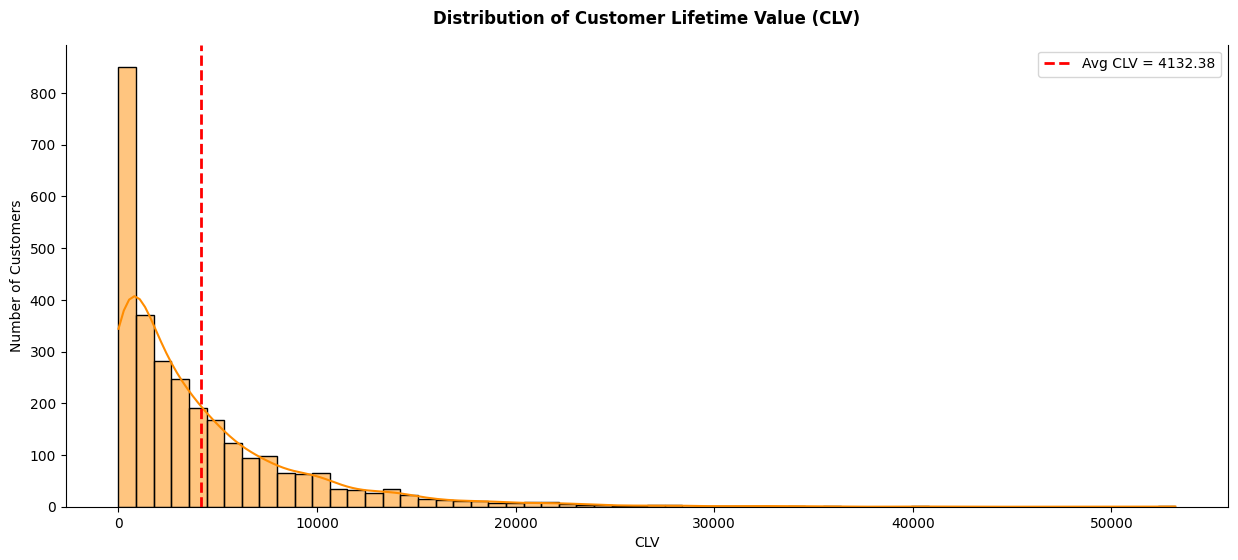

Top 10 High-Value Customers:


,user_id,total_price,num_order,first_order,last_order,apv,frequency,lifespan_months,COGS,gross_margin,CLV
0,1725,4672.11,7,2022-05-09 15:00:00,2025-06-22 06:21:00,667.444286,7,37.966667,3270.477,0.3,53215.3329
1,1068,3415.08,6,2022-01-14 10:04:00,2025-04-10 01:07:00,569.180000,6,39.366667,2390.556,0.3,40332.0948
2,2157,2877.03,9,2022-03-08 02:37:00,2025-08-04 21:26:00,319.670000,9,41.500000,2013.921,0.3,35819.0235
3,2280,3017.25,5,2022-04-05 12:10:00,2025-05-07 15:22:00,603.450000,5,37.600000,2112.075,0.3,34034.5800
4,2045,3322.48,5,2022-08-17 13:09:00,2025-06-06 14:18:00,664.496000,5,34.133333,2325.736,0.3,34022.1952


In [407]:
# Average purchase value per transaction
clv_df["apv"] = clv_df["total_price"] / clv_df["num_order"]

# frequency (number of transactions)
clv_df["frequency"] = clv_df["num_order"]

# Lifespan: number of months between first and last purchase (+1 to avoid division by zero)
clv_df["lifespan_months"] = ((clv_df["last_order"] - clv_df["first_order"]).dt.days / 30).clip(lower=1)

clv_df["COGS"] = clv_df["total_price"] * 0.7 # We assume COGS = 70% total_price.
clv_df["gross_margin"] = (clv_df["total_price"] - clv_df["COGS"]) / clv_df["total_price"]

# Customer Lifetime Value
clv_df["CLV"] = clv_df["apv"] * clv_df["gross_margin"] * clv_df["frequency"] * clv_df["lifespan_months"]

# Calculate the average CLV across all customers ---
avg_clv = clv_df["CLV"].mean()
print(f"[✓] Average CLV across all customers: {avg_clv:.2f}")

# Plot CLV distribution with Seaborn ---
plt.figure(figsize=(15,6))
sns.histplot(clv_df["CLV"], bins=60, edgecolor="black", kde=True, color="darkorange")
sns.despine(top=True, right=False, left=False, bottom=False)

# Add vertical line for average CLV
plt.axvline(avg_clv, color="red", linestyle="dashed", linewidth=2, label=f"Avg CLV = {avg_clv:.2f}")

# Titles and labels
plt.title("Distribution of Customer Lifetime Value (CLV)", fontsize=12, fontweight="bold", pad=15)
plt.xlabel("CLV")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

# Display top customers with highest CLV (VIP customers)
print("Top 10 High-Value Customers:")
display(clv_df.sort_values(by="CLV", ascending=False).reset_index(drop=True).head())

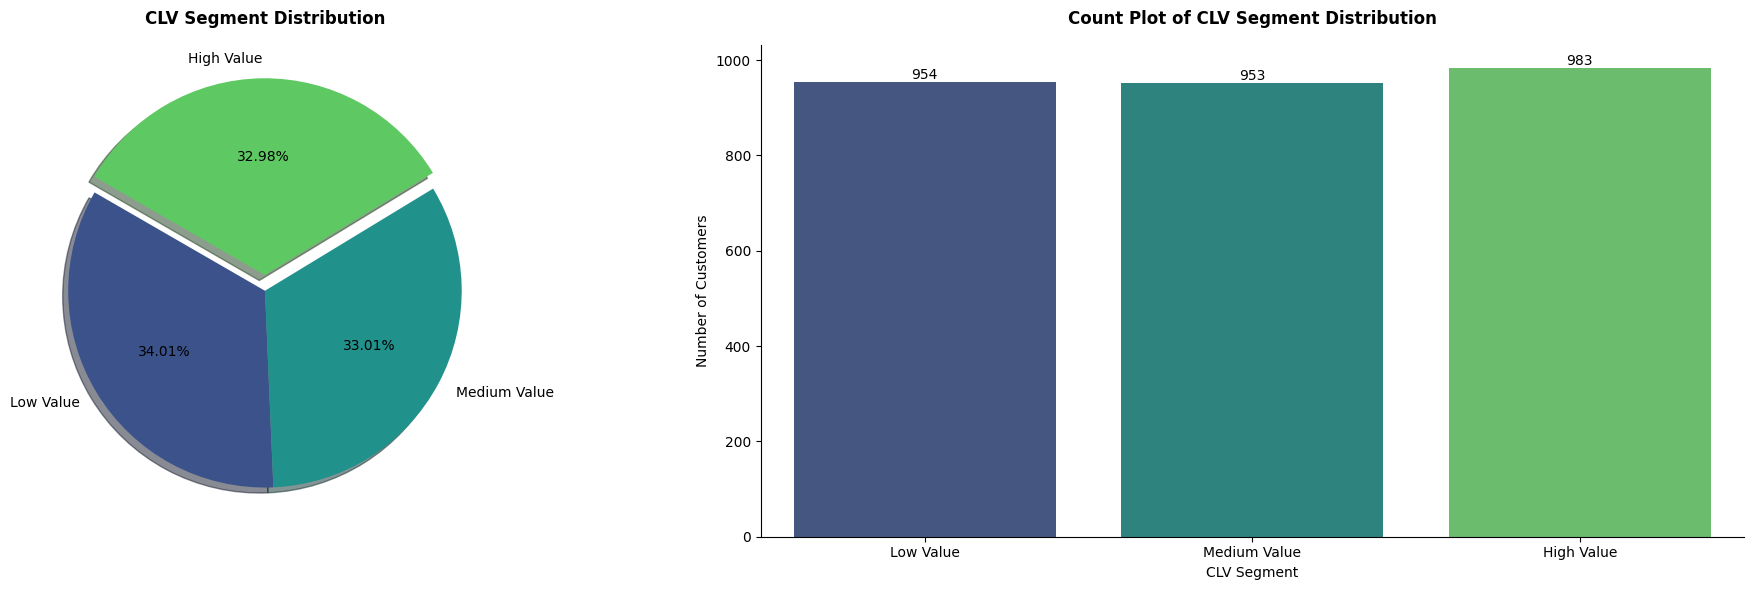

In [408]:
q33 = clv_df["CLV"].quantile(0.33)
q66 = clv_df["CLV"].quantile(0.66)

# Function to classify customers
def clv_segment(x):
    if x <= q33:
        return "Low Value"
    elif x <= q66:
        return "Medium Value"
    else:
        return "High Value"

# Add Segment column
clv_df["CLV_Segment"] = clv_df["CLV"].apply(clv_segment)

# Segment distribution
CLV_Segment_Distribution = clv_df["CLV_Segment"].value_counts()

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(20, 6))
n_colors = clv_df["CLV_Segment"].nunique()
viridis_colors = sns.color_palette("viridis", n_colors=n_colors)

# ax[0] – Pie chart
ax[0].pie(
    CLV_Segment_Distribution,
    labels=["Low Value", "Medium Value", "High Value"],
    colors=viridis_colors,
    autopct="%1.2f%%",
    startangle=150,
    explode=(0, 0, 0.08),
    shadow=True
)
ax[0].set_title("CLV Segment Distribution", weight="bold", fontsize=12, pad=15)

# ax[1] – Count plot
sns.countplot(
    data=clv_df,
    x="CLV_Segment",
    palette=viridis_colors,
    ax=ax[1],
    order=["Low Value", "Medium Value", "High Value"]
)
ax[1].set_title("Count Plot of CLV Segment Distribution", weight="bold", fontsize=12, pad=15)

# Add labels on top of bars
for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%d", label_type="edge", fontsize=10)

ax[1].set_ylabel("Number of Customers")
ax[1].set_xlabel("CLV Segment")
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()

**Insights:**

* CLV is heavily skewed → **a small number of customers drive most of the value**.
* Low/Medium/High segments form a clear balanced structure.
* High Value = **strategic segment**, Medium Value = **growth opportunity**, Low Value = **optimize servicing**.

## Customer Analysis
### Customers' Spending By Geolocation

#### Top 10 Selling Geolocation

In [409]:
# Group data by country and calculate:
# - orders_count: number of unique orders
# - total_value: sum of all order values (GMV)
df_country = (
    df.groupby(by="country")
      .agg(
          orders_count=("order_id", "nunique"),
          total_value=("total_price", "sum")
      )
      .reset_index()
      .sort_values(by="orders_count", ascending=False)
)

# Create main figure
fig = go.Figure()

# Add bar chart for number of orders per country
fig.add_trace(
    go.Bar(
        x=df_country["country"].head(10),     # Top 10 countries by orders
        y=df_country["orders_count"].head(10),
        name="Orders Count",
        marker_color="rgb(64,224,208)",      # Turquoise color for bars
        # hovertemplate = "%{x}" +  "<br>Number of orders: %{y}",
    )
)

# Add line chart for total GMV per country
fig.add_trace(
    go.Scatter(
        x=df_country["country"].head(10),
        y=df_country["total_value"].head(10),
        name="GMV",
        yaxis="y2",                           # Assign to secondary axis
        marker_color="rgb(255,160,122)",      # Light salmon color
        mode="lines+markers",
        # hovertemplate = "%{x}" + "<br>GMV: $%{y}",
    )
)

# Customize layout
fig.update_layout(
    title=dict(
        text="<b>Top 10 Selling Geolocation<b>",
        font=dict(size=12, family="Segoe UI", color="white")
    ),

    # Left axis for order count
    yaxis=dict(
        side="left",
        range=[0, max(df_country["orders_count"]) + 1000],
        showgrid=False,
        zeroline=True,
        showline=False,
        showticklabels=False
    ),

    # Right axis for total GMV
    yaxis2=dict(
        side="right",
        overlaying="y",
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False
    ),

    xaxis=dict(
        showline=True,
        linecolor="rgb(204, 204, 204)",
        linewidth=2
    ),

    legend=dict(orientation="h"),

    # Footer annotation
    annotations=[
        dict(
            text="Created By Thuan Dao.",
            xref="paper", yref="paper",
            x=1, y=-.15,
            showarrow=False,
            font=dict(size=10, color="white", family="Segoe UI")
        )
    ],

    hovermode="x unified",
    template="plotly_dark",
    width=1500,
    height=600
)

# Render the chart
fig.show()

**Insight:**

* **United States** leads in both order volume and GMV, establishing it as the strongest and most profitable market.
* **India** ranks high in order volume but shows a sharp drop in GMV, suggesting lower average order value.
* **United Kingdom** maintains a solid order count but contributes relatively low GMV, indicating underperformance in revenue.
* **Germany, Canada, France, Spain, and Netherlands** show moderate order counts with lower GMV, reflecting steady but low-value consumer behavior.
* **Brazil** exhibits fewer orders compared to top markets but achieves comparatively higher GMV, pointing to higher-value transactions.
* The variation between order count and GMV across countries highlights differences in purchasing power and buying behavior.

#### Consumers' spending by location

In [410]:
def world_map_transaction(df=df_country, feature = "country"):
    import folium
    from geopy.geocoders import Nominatim
    from geopy.extra.rate_limiter import RateLimiter

    df_location = df.copy()

    # Calculate the approximate latitude/ longitude coordinates for unique state in the data
    unique_country = df_location[feature].unique()
    state_coords = {}

    geolocator = Nominatim(user_agent="location_mapper")
    geocode = RateLimiter(
        geolocator.geocode,
        min_delay_seconds=1,
        max_retries=3,
        error_wait_seconds=3,
        swallow_exceptions=False
    )

    print(f"[*] Fetching coordinates for {len(unique_country)} unique country...")

    # Get approximate coordinates for each unique state
    for country in unique_country:
        try:
            loc = geocode(f"{country}", timeout=15)
            if loc:
                state_coords[country] = (loc.latitude, loc.longitude)
            else:
                print(f"[!] Coordinates not found for {country}")
        except Exception as e:
            print(f"[x] Error fetching coordinates for {country}: {e}")

    # Add the coordinates to the DataFrame
    df_location["country"] = df_location["country"].astype(str)
    df_location["Coordinates"] = df_location["country"].map(state_coords)
    df_location = df_location[
        df_location["Coordinates"].apply(lambda x: isinstance(x, (list, tuple)) and len(x) == 2)
    ]

    # Iniitialize the Folium map centered at an approximate central point
    if len(state_coords) > 0:
        initial_coords = list(state_coords.values())[0]
    else:
        print("[!] No coordinates found — initializing map at (0,0)")
        initial_coords = [0, 0]

    mymap = folium.Map(location=initial_coords, zoom_start=5, tiles="CartoDB dark_matter")

    for _, row in df_location.iterrows():
        coords = row["Coordinates"]

        tooltip_html = f"""
        <div style='font-size:13px; line-height:1.5'>
            <b>Country:</b> {row['country']}<br>
            <b>Number Order:</b> {row['orders_count']}<br>
            <b>GMV:</b> ${row['total_value']:,.2f}
        </div>
        """

        folium.Marker(
            location=coords,
            tooltip=folium.Tooltip(tooltip_html, sticky=True),
            icon=folium.Icon(color="lightgray", icon="info-sign")
        ).add_to(mymap)

    map_path = f"./saved-map.html"
    mymap.save(map_path)
    print(f"[✓] Map saved successfully: {map_path}")

    return mymap

world_map_transaction()

[*] Fetching coordinates for 15 unique country...
[✓] Map saved successfully: ./saved-map.html


### Customers Returned and New Customers

In [411]:
df_order_items_ = df.groupby(by=["order_id", "product_id", "user_id", "order_date"]).agg(
    product_counts = ("product_id", "count"),
    total_price = ("total_price", "sum")
).reset_index()
df_order_items_["year_month"] = df_order_items_["order_date"].dt.to_period("M")

# Create an order index per customer based on purchase timestamp
# Rank orders chronologically for each customer
df_order_items_["order_index"] = df_order_items_.groupby("user_id")["order_date"]\
                                               .rank(method="first", ascending=True)

display(df_order_items_.head())

,order_id,product_id,user_id,order_date,product_counts,total_price,year_month,order_index
0,100000,201,861,2024-10-30 16:07:00,1,186.22,2024-10,1.0
1,100001,366,1295,2022-04-17 09:31:00,1,101.09,2022-04,1.0
2,100002,115,1131,2022-11-08 12:38:00,1,253.61,2022-11,1.0
3,100003,159,1096,2022-05-18 17:24:00,1,23.46,2022-05,1.0
4,100004,42,1639,2024-01-25 05:51:00,1,1487.96,2024-01,4.0


In [412]:
# Create a monthly summary of new vs returning customers
data_timeseries = (
    # Step 1: Aggregate new customers (first order of each customer)
    df_order_items_.query("order_index == 1")  # select only first orders
    .groupby("year_month")
    .agg(
        new_customers_count=("user_id", "nunique"),  # number of new customers
        new_customers_value=("total_price", "sum"),  # total value of new customers
    )
    # Step 2: Merge with returning customers (orders after first)
    .merge(
        right=(
            df_order_items_.query("order_index > 1")  # select repeat orders
            .groupby("year_month")
            .agg(
                return_customers_count=("user_id", "nunique"),  # number of returning customers
                return_customers_value=("total_price", "sum"),  # total value from returning customers
            )
        ),
        how="left",  # keep all months from new customers
        on="year_month"
    )
    .fillna(0)  # fill months with no returning customers with 0
    .reset_index()  # reset index for clean DataFrame
)

display(data_timeseries.head())

,year_month,new_customers_count,new_customers_value,return_customers_count,return_customers_value
0,2022-01,247,38277.44,12,1936.80
1,2022-02,160,23476.03,24,4627.91
2,2022-03,203,34535.35,38,4153.17
3,2022-04,183,29840.11,55,7267.30
4,2022-05,168,22502.60,78,12209.74


In [413]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x = data_timeseries["year_month"].astype(str),
        y = data_timeseries["new_customers_count"],
        name = "Number of new customers",
        marker_color = "mediumaquamarine"
    )
)

fig.add_trace(
    go.Bar(
        x = data_timeseries["year_month"].astype(str),
        y = data_timeseries["return_customers_count"],
        name = "Number of returned customers",
        marker_color = "powderblue"
    )
)

fig.add_trace(
    go.Scatter(
        x = data_timeseries["year_month"].astype(str),
        y = data_timeseries["new_customers_value"],
        name = "Revenue from new customers",
        yaxis = "y2",
        marker_color = "indianred",
        mode="lines+markers"
    )
)

fig.add_trace(
    go.Scatter(
        x = data_timeseries["year_month"].astype(str),
        y = data_timeseries["return_customers_value"],
        name = "Revenue from returned customers",
        yaxis = "y2",
        marker_color = "sandybrown",
        mode="lines+markers"
    )
)

fig.update_layout(
    title = dict(text="<b>New Customers And Return Customers By Month<b>",
                 font=dict(size=12, family="Segoe UI", color="white")),
    barmode = "stack",
    yaxis = dict(side = "left", showgrid = False, zeroline = True, showline = False, showticklabels = False),
    yaxis2 = dict(side = "right", overlaying = "y", showgrid = False, zeroline = False, showline = False, showticklabels = False),
    xaxis = dict(showline = True, linecolor = "rgb(204, 204, 204)", linewidth = 2),
    legend = dict(orientation="h"),
    hovermode = "x unified",
    annotations=[dict(text="Created By Thuan Dao.", xref="paper", yref="paper", x=1.05, y=-0.15, 
    showarrow=False, font=dict(size=10, color="white", family="Segoe UI"))],
    template="plotly_dark",
    width=1500,
    height=600
)
fig.show()

**Insight:**

* **New customers consistently dominate total monthly customer volume**, showing strong acquisition performance throughout the period.
* **Returned customers remain stable but significantly lower**, indicating limited repeat engagement and retention challenges.
* **Revenue from returned customers steadily increases over time**, suggesting that **repeat buyers spend more per order** even if their count is small.
* **Revenue from new customers declines**, implying **lower-quality acquisition** or **reduced first-purchase value**.
* The gap between customer count and revenue trends highlights **different spending behaviors**:

  * *New customers = high volume, low value*.
  * *Returned customers = low volume, high value*.

## Product Analysis

### Top Products Sold By Category

In [414]:
data_product = df.groupby(by="category")\
                 .agg(
                    product_counts = ("product_id", "count"),
                    total_price = ("total_price", "sum")
                 ).reset_index()
display(data_product.head())

,category,product_counts,total_price
0,Beauty,959,63246.01
1,Books,986,30427.03
2,Clothing,1859,174025.90
3,Electronics,1462,720704.76
4,Grocery,1106,38863.46


In [415]:
fig = go.Figure()

fig.add_trace(
    go.Bar (
        x = data_product["category"],
        y = data_product["product_counts"],
        name = "Products Sold",
        marker_color = "rgb(0,204,153)"
    )
)

fig.add_trace(
    go.Scatter (
        x = data_product["category"],
        y = data_product["total_price"],
        name = "GMV",
        yaxis = "y2",
        marker_color = "rgb(255,99,132)",
        mode="lines+markers"
    )
)

fig.update_layout(
    title = dict(text="<b>Product Categories Performance<b>",
                 font=dict(size=12, family="Segoe UI", color="white")),
    yaxis = dict(side = "left", showgrid = False, zeroline = True, showline = False, showticklabels = False),
    yaxis2 = dict(side = "right", overlaying = "y", showgrid = False, zeroline = False, showline = False, showticklabels = False),
    xaxis = dict(showline = True, linecolor = "rgb(204, 204, 204)", linewidth = 2),
    legend = dict(orientation="h"),
    annotations=[dict(text="Created By Thuan Dao.", xref="paper", yref="paper", x=1, y=-.15,
    showarrow=False, font=dict(size=10, color="white", family="Segoe UI"))],
    hovermode = "x unified",
    template="plotly_dark",
    width=1500,
    height=600
)
fig.show()

**Insight:**

* **Clothing and Electronics** lead in both product volume and GMV, making them the **core revenue-driving categories**.
* **Home and Sports** show strong product sales but lower GMV, indicating **smaller basket sizes or lower-priced items**.
* **Beauty and Books** generate decent sales volume but low GMV, reflecting **low average order value** and price-sensitive purchasing behavior.
* **Grocery** delivers the lowest GMV despite stable sales, characterizing it as a **high-volume, low-value category**.
* **Toys** ranks the lowest in both sales and GMV, suggesting weak demand and limited revenue contribution.

### Products Segmentation

In [416]:
df.head()

,order_id,user_id,product_id,category,price,qty,total_price,order_date,country,customer_segment,quarter
0,100000,861,201,Sports,93.11,2,186.22,2024-10-30 16:07:00,Brazil,Mid-Value,2024Q4
1,100001,1295,366,Home,101.09,1,101.09,2022-04-17 09:31:00,Canada,Low-Value,2022Q2
2,100002,1131,115,Electronics,253.61,1,253.61,2022-11-08 12:38:00,India,Mid-Value,2022Q4
3,100003,1096,159,Clothing,11.73,2,23.46,2022-05-18 17:24:00,India,Low-Value,2022Q2
4,100004,1639,42,Electronics,743.98,2,1487.96,2024-01-25 05:51:00,Canada,High-Value,2024Q1


In [417]:
data_products_seg = df.groupby(by="product_id")\
                      .agg(
                            sales_volume=("product_id", "count"),  # number of items sold
                            sales_values=("total_price", "sum")    # total sales value
                      )\
                      .sort_values(by="sales_values", ascending=False)\
                      .reset_index()
display(data_products_seg.head())

,product_id,sales_volume,sales_values
0,333,31,7949.95
1,336,26,7552.55
2,245,31,7378.25
3,274,22,7127.79
4,288,23,7093.33


In [418]:
# Aggregate daily product sales
data_sales_his = (
    df[["product_id", "order_date"]]
    .groupby(["order_date", "product_id"])
    .agg(
        product_sold=("product_id", "count")  # count number of products sold per day
    )
    .reset_index()  # reset index for clean DataFrame
)

display(data_sales_his.head())

,order_date,product_id,product_sold
0,2022-01-01 03:49:00,274,1
1,2022-01-01 06:56:00,400,1
2,2022-01-01 07:33:00,373,1
3,2022-01-01 08:44:00,393,1
4,2022-01-01 10:34:00,332,1


In [419]:
# Rank each purchase date sequentially to create a "day" index
data_sales_his["day"] = data_sales_his["order_date"].rank(method="dense", ascending=True).astype(int)

# Pivot the DataFrame to have one row per product and one column per day
# Values are number of products sold on that day
data_sales_his = (
    data_sales_his
    .pivot(index="product_id", columns="day", values="product_sold")
    .fillna(0)  # fill missing sales with 0
    .astype(int)
    .reset_index()
)

# Rename day columns to "day_1", "day_2", ...
data_sales_his.columns = [data_sales_his.columns[0]] + ["day_" + str(col) for col in data_sales_his.columns[1:]]

# Store the day columns for later calculations
sales_col = data_sales_his.columns[1:]

# Merge product-level sales summary (e.g., sales volume and value)
data_sales_his = data_sales_his.merge(data_products_seg, how="left", on="product_id")

# Calculate the mean daily sales for each product
data_sales_his["mean"] = data_sales_his[sales_col].mean(axis=1)

# Keep only products with at least some sales
data_sales_his = data_sales_his.query("mean > 0")

# Calculate the standard deviation of daily sales for each product
data_sales_his["std"] = data_sales_his[sales_col].std(axis=1)

# Calculate the coefficient of variation (std / mean) for each product
# This measures sales variability relative to mean sales
data_sales_his["coef"] = data_sales_his["std"] / data_sales_his["mean"]

display(data_sales_his.head())

,product_id,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,day_32,day_33,day_34,day_35,day_36,day_37,day_38,day_39,day_40,day_41,day_42,day_43,day_44,day_45,day_46,day_47,day_48,day_49,day_50,day_51,day_52,day_53,day_54,day_55,day_56,day_57,day_58,day_59,day_60,day_61,day_62,day_63,day_64,day_65,day_66,day_67,day_68,day_69,day_70,day_71,day_72,day_73,day_74,day_75,day_76,day_77,day_78,day_79,day_80,day_81,day_82,day_83,day_84,day_85,day_86,day_87,day_88,day_89,day_90,day_91,day_92,day_93,day_94,day_95,day_96,day_97,day_98,day_99,day_100,day_101,day_102,day_103,day_104,day_105,day_106,day_107,day_108,day_109,day_110,day_111,day_112,day_113,day_114,day_115,day_116,day_117,day_118,day_119,day_120,day_121,day_122,day_123,day_124,day_125,day_126,day_127,day_128,day_129,day_130,day_131,day_132,day_133,day_134,day_135,day_136,day_137,day_138,day_139,day_140,day_141,day_142,day_143,day_144,day_145,day_146,day_147,day_148,day_149,day_150,day_151,day_152,day_153,day_154,day_155,day_156,day_157,day_158,day_159,day_160,day_161,day_162,day_163,day_164,day_165,day_166,day_167,day_168,day_169,day_170,day_171,day_172,day_173,day_174,day_175,day_176,day_177,day_178,day_179,day_180,day_181,day_182,day_183,day_184,day_185,day_186,day_187,day_188,day_189,day_190,day_191,day_192,day_193,day_194,day_195,day_196,day_197,day_198,day_199,day_200,day_201,day_202,day_203,day_204,day_205,day_206,day_207,day_208,day_209,day_210,day_211,day_212,day_213,day_214,day_215,day_216,day_217,day_218,day_219,day_220,day_221,day_222,day_223,day_224,day_225,day_226,day_227,day_228,day_229,day_230,day_231,day_232,day_233,day_234,day_235,day_236,day_237,day_238,day_239,day_240,day_241,day_242,day_243,day_244,day_245,day_246,day_247,day_248,day_249,...,day_9729,day_9730,day_9731,day_9732,day_9733,day_9734,day_9735,day_9736,day_9737,day_9738,day_9739,day_9740,day_9741,day_9742,day_9743,day_9744,day_9745,day_9746,day_9747,day_9748,day_9749,day_9750,day_9751,day_9752,day_9753,day_9754,day_9755,day_9756,day_9757,day_9758,day_9759,day_9760,day_9761,day_9762,day_9763,day_9764,day_9765,day_9766,day_9767,day_9768,day_9769,day_9770,day_9771,day_9772,day_9773,day_9774,day_9775,day_9776,day_9777,day_9778,day_9779,day_9780,day_9781,day_9782,day_9783,day_9784,day_9785,day_9786,day_9787,day_9788,day_9789,day_9790,day_9791,day_9792,day_9793,day_9794,day_9795,day_9796,day_9797,day_9798,day_9799,day_9800,day_9801,day_9802,day_9803,day_9804,day_9805,day_9806,day_9807,day_9808,day_9809,day_9810,day_9811,day_9812,day_9813,day_9814,day_9815,day_9816,day_9817,day_9818,day_9819,day_9820,day_9821,day_9822,day_9823,day_9824,day_9825,day_9826,day_9827,day_9828,day_9829,day_9830,day_9831,day_9832,day_9833,day_9834,day_9835,day_9836,day_9837,day_9838,day_9839,day_9840,day_9841,day_9842,day_9843,day_9844,day_9845,day_9846,day_9847,day_9848,day_9849,day_9850,day_9851,day_9852,day_9853,day_9854,day_9855,day_9856,day_9857,day_9858,day_9859,day_9860,day_9861,day_9862,day_9863,day_9864,day_9865,day_9866,day_9867,day_9868,day_9869,day_9870,day_9871,day_9872,day_9873,day_9874,day_9875,day_9876,day_9877,day_9878,day_9879,day_9880,day_9881,day_9882,day_9883,day_9884,day_9885,day_9886,day_9887,day_9888,day_9889,day_9890,day_9891,day_9892,day_9893,day_9894,day_9895,day_9896,day_9897,day_9898,day_9899,day_9900,day_9901,day_9902,day_9903,day_9904,day_9905,day_9906,day_9907,day_9908,day_9909,day_9910,day_9911,day_9912,day_9913,day_9914,day_9915,day_9916,day_9917,day_9918,day_9919,day_9920,day_9921,day_9922,day_9923,day_9924,day_9925,day_9926,day_9927,day_9928,day_9929,day_9930,day_9931,day_9932,day_9933,day_9934,day_9935,day_9936,day_9937,day_9938,day_9939,day_9940,day_9941,day_9942,day_9943,day_9944,day_9945,day_9946,day_9947,day_9948,day_9949,day_9950,day_9951,day_9952,day_9953,day_9954,day_9955,day_9956,day_9957,day_9958,day_9959,day_9960,day_9961,day

In [420]:
# Create a summary of product-level sales by dropping daily sales columns
data_product_summary = data_sales_his.copy().drop(columns=sales_col, axis=1)

# Calculate total sales value across all products
total_sales_values = data_product_summary["sales_values"].sum()

# Calculate percentage contribution of each product to total sales
data_product_summary["%sales"] = data_product_summary["sales_values"] / total_sales_values * 100

# Sort products by percentage sales contribution in descending order
data_product_summary.sort_values(by="%sales", ascending=False, inplace=True, ignore_index=True)

# Calculate cumulative sales percentage (useful for Pareto/ABC analysis)
data_product_summary["%sales_cs"] = data_product_summary["%sales"].cumsum()

display(data_product_summary.head())

,product_id,sales_volume,sales_values,mean,std,coef,%sales,%sales_cs
0,333,31,7949.95,0.003108,0.055669,17.909267,0.498170,0.498170
1,336,26,7552.55,0.002607,0.050995,19.560554,0.473267,0.971437
2,245,31,7378.25,0.003108,0.055669,17.909267,0.462345,1.433783
3,274,22,7127.79,0.002206,0.046918,21.268840,0.446651,1.880433
4,288,23,7093.33,0.002306,0.047970,20.800290,0.444491,2.324925


In [421]:
# Total number of products
n_products = len(data_product_summary)

# Define the number of products in each ABC category
n_a, n_b = int(0.05 * n_products), int(0.2 * n_products)  # top 5% = A, next 15% = B, rest = C

# Assign a unique SKU ID to each product
data_product_summary["sku_id"] = pd.Series(range(1, n_products + 1)).astype(int)

# Assign ABC categories based on product ranking
# - "A": top 5% of products by sales contribution
# - "B": next 15% of products
# - "C": remaining products
data_product_summary["abc"] = pd.Series(range(n_products)).apply(
    lambda x: "A" if x <= n_a - 1 else "B" if x <= n_b - 1 else "C"
)

display(data_product_summary.head())

,product_id,sales_volume,sales_values,mean,std,coef,%sales,%sales_cs,sku_id,abc
0,333,31,7949.95,0.003108,0.055669,17.909267,0.498170,0.498170,1,A
1,336,26,7552.55,0.002607,0.050995,19.560554,0.473267,0.971437,2,A
2,245,31,7378.25,0.003108,0.055669,17.909267,0.462345,1.433783,3,A
3,274,22,7127.79,0.002206,0.046918,21.268840,0.446651,1.880433,4,A
4,288,23,7093.33,0.002306,0.047970,20.800290,0.444491,2.324925,5,A


In [422]:
# Loop through each ABC product class and summarize its contribution
for product_class in ["A", "B", "C"]:
    # Filter products belonging to the current class
    filter = data_product_summary[data_product_summary["abc"] == product_class]
    
    # Calculate the percentage of products in this class
    percentage = len(filter) / len(data_product_summary) * 100
    
    # Get the highest SKU ID in this class (as a proxy for number of SKUs)
    sku_number = filter["sku_id"].max()
    
    # Calculate total sales percentage contributed by this class
    sales_percent = filter["%sales"].sum()
    
    # Print a summary of the class
    print(f"Class {product_class} ({percentage:.0f}%) has {sku_number} SKUs and {sales_percent:.2f}% of turnover")

Class A (5%) has 25 SKUs and 10.35% of turnover
Class B (15%) has 100 SKUs and 22.76% of turnover
Class C (80%) has 500 SKUs and 66.89% of turnover


In [423]:
import math

data_product_plot = data_product_summary.copy()
class_mapping = {"A": "mediumturquoise", "B": "indianred", "C": "limegreen"}
fig = go.Figure()

for prod_class in class_mapping.keys():
    fig.add_trace(
        go.Scatter(
            x=data_product_plot[data_product_plot["abc"] == prod_class]["%sales"],
            y=data_product_plot[data_product_plot["abc"] == prod_class]["coef"],
            name = "Class " + str(prod_class),
            marker=dict(color=class_mapping[prod_class]),
            mode="markers"
        )
    )

fig.update_layout(
    title = dict(text="<b>Distribution by Demand Variability<b>",
                 font=dict(size=12, family="Segoe UI", color="white")),
    yaxis = dict(side = "left", linecolor = "rgb(204, 204, 204)", showline = True, linewidth = 2, title = "Variability of the demand",
                range = [math.floor(min(data_product_summary["coef"])), math.ceil(max(data_product_summary["coef"])) + 1]),
    xaxis = dict(showline = True, linecolor = "rgb(204, 204, 204)", linewidth = 2, title = "Percentage of Turnover (%)",
            range = [math.floor(min(data_product_summary["%sales"])) - 0.01, (max(data_product_summary["%sales"])) + 0.01]),
    legend = dict(orientation="h"),
    annotations=[dict(text="Created By Thuan Dao.", xref="paper", yref="paper", x=1, y=-.15,
    showarrow=False, font=dict(size=10, color="white", family="Segoe UI"))],
    template="plotly_dark",
    width=1500,
    height=600
)
fig.show()

In [424]:
fig = make_subplots(
    rows=1, cols=3,
    start_cell="top-left",
    subplot_titles=("Class A", "Class B", "Class C")
)

product_classes = ["A", "B", "C"]
col = 1

for product_class in product_classes:
    x = data_product_summary[data_product_summary["abc"] == product_class]["sales_values"]
    trace = go.Histogram(
        x=x,
        nbinsx=40,
        marker=dict(color="mediumturquoise" if product_class == "A"
                    else "indianred" if product_class == "B"
                    else "limegreen")
    )
    fig.append_trace(trace, 1, col)
    fig.update_xaxes(
        title_text="Sales Values",
        title_font=dict(size=10, family="Segoe UI", color="white"),
        row=1, col=col
    )
    fig.update_yaxes(
        title_text="Product Count",
        title_font=dict(size=10, family="Segoe UI", color="white"),
        row=1, col=col
    )
    col += 1

# Layout styling and configuration
fig.update_annotations(font=dict(family="Segoe UI", size=12, color="white"))

fig.update_layout(
    title=dict(
        text="<b>Sales Distribution By Product Class<b>",
        font=dict(size=12, family="Segoe UI", color="white")
    ),
    showlegend=False,
    bargap=0.01,
    template="plotly_dark",
    width=1500,
    height=600
)

fig.add_annotation(
    text="Created By Thuan Dao.",
    xref="paper", yref="paper",
    x=1, y=-0.15,
    showarrow=False,
    font=dict(size=10, color="white", family="Segoe UI")
)

fig.show()

**Insight:**

* **Class A** shows a concentrated distribution at high sales values (6,000–8,000), indicating a **premium and stable product segment**.
* **Class B** has a wider spread (4,200–5,600), reflecting **greater variability in sales** and a mix of mid-range product performance.
* **Class C** displays a broad distribution skewed toward lower sales values (1,000–4,000), highlighting a **high-volume but lower-value segment**.
* The clear differences across the three classes suggest **distinct pricing positions and market roles**—with Class A as premium, Class B as mid-tier, and Class C as mass-market.

In [425]:
# Calculate a volatility threshold as the midpoint of the range of standard deviations
volatility_threshold = (max(data_product_summary["std"]) - min(data_product_summary["std"])) / 2

# Define a function to classify products based on sales percentage and volatility
def classify(product):
    if product["%sales"] <= 0.25 and product["std"] <= volatility_threshold:
        return "Low Volume, Low Volatility"
    elif product["%sales"] > 0.25 and product["std"] <= volatility_threshold:
        return "High Volume, Low Volatility"
    elif product["%sales"] <= 0.25 and product["std"] > volatility_threshold:
        return "Low Volume, High Volatility"
    else:
        return "High Volume, High Volatility"

# Apply the classification function to each product
data_product_summary["type"] = data_product_summary.apply(lambda x: classify(x), axis=1)

display(data_product_summary.head())

,product_id,sales_volume,sales_values,mean,std,coef,%sales,%sales_cs,sku_id,abc,type
0,333,31,7949.95,0.003108,0.055669,17.909267,0.498170,0.498170,1,A,"High Volume, High Volatility"
1,336,26,7552.55,0.002607,0.050995,19.560554,0.473267,0.971437,2,A,"High Volume, High Volatility"
2,245,31,7378.25,0.003108,0.055669,17.909267,0.462345,1.433783,3,A,"High Volume, High Volatility"
3,274,22,7127.79,0.002206,0.046918,21.268840,0.446651,1.880433,4,A,"High Volume, High Volatility"
4,288,23,7093.33,0.002306,0.047970,20.800290,0.444491,2.324925,5,A,"High Volume, High Volatility"


In [426]:
type_mapping = {
    "Low Volume, Low Volatility": {
        "info" : "Easy/ Low ROI",
        "color": "powderblue",
        "x": [0, 2, 2, 0],
        "y": [0, 0, 2, 2]
    },
    "Low Volume, High Volatility": {
        "info" : "Difficult/ Low ROI",
        "color": "orangered",
        "x": [0, 0, 2, 2],
        "y": [2, 4, 4, 2],
    },
    "High Volume, Low Volatility": {
        "info" : "Moderate+/ High ROI",
        "color": "skyblue",
        "x": [2, 4, 4, 2],
        "y": [0, 0, 2, 2],
    },
    "High Volume, High Volatility": {
        "info" : "Critical+/ Moderate+/ High ROI",
        "color": "yellowgreen",
        "x": [2, 4, 4, 2],
        "y": [2, 2, 4, 4],
    }
}
def plot (x, y, _type_):
    return go.Scatter (
        x = x,
        y = y,
        fill = "toself",
        fillcolor = type_mapping[_type_]["color"],
        hoveron = "fills",
        hoverinfo = "text",
        line_color = "white",
        mode = "lines+text",
        name = _type_,
    )
total_values = data_product_summary["sales_values"].sum()
def plot_annotation (x, y, _type_):
    total_products_sold = data_product_summary[data_product_summary["type"] == _type_]["product_id"].nunique()
    total_sales_volume = data_product_summary[data_product_summary["type"] == _type_]["sales_volume"].sum()
    total_sales_values = data_product_summary[data_product_summary["type"] == _type_]["sales_values"].sum()
    values_percent = total_sales_values/total_values * 100
    info = type_mapping[_type_]["info"]
    text = f"<b>{_type_}</b><br>{info}<br>Total Products Sold: {total_products_sold}<br>Total Sales Volume: {total_sales_volume}<br>Total Sales Value: {total_sales_values:.2f} ({values_percent:.2f}%)"
    return fig.add_annotation (
        x = x, y = y , font = dict(color = "black", size = 12),text = text, align= "left", xanchor = "left", showarrow = False
    )

# Only keep top two quadrants
types_to_plot = [
    "Low Volume, High Volatility",
    "High Volume, High Volatility"
]

fig = go.Figure()

# Recalculate total sales value for percentage
total_values = data_product_summary[
    data_product_summary["type"].isin(types_to_plot)
]["sales_values"].sum()

# Plot only the selected quadrants
for _type_ in types_to_plot:
    x = type_mapping[_type_]["x"]
    y = type_mapping[_type_]["y"]

    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        fill="toself",
        fillcolor=type_mapping[_type_]["color"],
        hoveron="fills",
        hoverinfo="text",
        line_color="white",
        mode="lines+text",
        name=_type_,
    ))

    # Add annotation inside each quadrant
    total_products_sold = data_product_summary[data_product_summary["type"] == _type_]["product_id"].nunique()
    total_sales_volume = data_product_summary[data_product_summary["type"] == _type_]["sales_volume"].sum()
    total_sales_values = data_product_summary[data_product_summary["type"] == _type_]["sales_values"].sum()
    values_percent = total_sales_values / total_values * 100
    info = type_mapping[_type_]["info"]

    text = (
        f"<b>{_type_}</b><br>"
        f"{info}<br>"
        f"Total Products Sold: {total_products_sold}<br>"
        f"Total Sales Volume: {total_sales_volume}<br>"
        f"Total Sales Value: {total_sales_values:.2f} ({values_percent:.2f}%)"
    )

    fig.add_annotation(
        x=x[0] + 0.05, y=y[0] + 1,
        font=dict(color="black", size=12),
        text=text,
        align="left",
        xanchor="left",
        showarrow=False,
    )

# Update layout
fig.update_layout(
    title=dict(
        text="<b>Sales Distribution By Product Class<b>",
        font=dict(size=12, family="Segoe UI", color="white")
    ),
    xaxis=dict(showline=False, range=[0, 4], rangemode="nonnegative"),
    yaxis=dict(showline=False, range=[2, 4], rangemode="nonnegative"),
    showlegend=False,
    template="plotly_dark",
    width=1500,
    height=600
)

fig.add_annotation(
    text="Created By Thuan Dao.",
    xref="paper", yref="paper",
    x=1, y=-0.15,
    showarrow=False,
    font=dict(size=10, color="white", family="Segoe UI")
)

fig.show()


## E-commerce Operation Analysis

### Time-series Analysis

#### Daily GMV

In [427]:
data_orders_timeseries_daily = df_order_items_.copy()
data_orders_timeseries_daily["date"] = data_orders_timeseries_daily["order_date"].dt.to_period("D")

# Aggregate daily metrics: number of orders, total product counts, total price
data_orders_timeseries_daily = (
    data_orders_timeseries_daily
    .groupby("date")
    .agg({
        "order_id": "count",          # daily order count
        "product_counts": "sum",      # daily total products sold
        "total_price": "sum",         # daily total sales value
    })
    .query("date.isna() == False")   # remove any rows with missing dates
    .reset_index()
)

# Calculate 7-day moving average of total sales value
data_orders_timeseries_daily["7d_moving_average"] = (
    data_orders_timeseries_daily.sort_values(by="date")[["total_price"]]
    .transform(lambda x: round(x.rolling(7).mean(), 2))
)

# Calculate 14-day moving average of total sales value
data_orders_timeseries_daily["14d_moving_average"] = (
    data_orders_timeseries_daily.sort_values(by="date")[["total_price"]]
    .transform(lambda x: round(x.rolling(14).mean(), 2))
)

# Calculate 30-day moving average of total sales value
data_orders_timeseries_daily["30d_moving_average"] = (
    data_orders_timeseries_daily.sort_values(by="date")[["total_price"]]
    .transform(lambda x: round(x.rolling(30).mean(), 2))
)

display(data_orders_timeseries_daily.head())

,date,order_id,product_counts,total_price,7d_moving_average,14d_moving_average,30d_moving_average
0,2022-01-01,11,11,1020.71,NaN,NaN,NaN
1,2022-01-02,9,9,1712.23,NaN,NaN,NaN
2,2022-01-03,4,4,567.24,NaN,NaN,NaN
3,2022-01-04,13,13,2949.85,NaN,NaN,NaN
4,2022-01-05,11,11,1620.69,NaN,NaN,NaN


In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter (
        x = data_orders_timeseries_daily["date"].astype(str),
        y = data_orders_timeseries_daily["total_price"],
        mode = "markers",
        name = "GMV",
        marker_color = "#da3644",
    )
)

fig.add_trace(
    go.Scatter (
        x = data_orders_timeseries_daily["date"].astype(str),
        y = data_orders_timeseries_daily["7d_moving_average"],
        mode = "lines",
        name = "7-D MA",
        marker_color = "#03b6fc",
    )
)

fig.add_trace(
    go.Scatter (
        x = data_orders_timeseries_daily["date"].astype(str),
        y = data_orders_timeseries_daily["14d_moving_average"],
        mode = "lines",
        name = "14-D MA",
        marker_color = "#d1e23b",
    )
)

fig.add_trace(
    go.Scatter (
        x = data_orders_timeseries_daily["date"].astype(str),
        y = data_orders_timeseries_daily["30d_moving_average"],
        mode = "lines",
        name = "30-D MA",
        marker_color = "#1de02d",
    )
)

fig.update_layout (
    title=dict(
        text="<b>Daily Revenue<b>",
        font=dict(size=12, family="Segoe UI", color="white")
    ),
    xaxis = dict (
        showline = True,
        linecolor = "rgb(204, 204, 204)",
        linewidth = 1.5,
    ),
    yaxis = dict (showticklabels = True),
    legend = dict(orientation = "h"),
    hovermode = "x unified",
    showlegend=True,
    template="plotly_dark",
    width=1500,
    height=600
)

fig.add_annotation(
    text="Created By Thuan Dao.",
    xref="paper", yref="paper",
    x=1, y=-0.15,
    showarrow=False,
    font=dict(size=10, color="white", family="Segoe UI")
)
fig.show()

**Insight:**

* **Daily revenue shows strong volatility**, with multiple unusual spikes indicating the impact of **campaigns, seasonality, or sudden buying behavior**.
* The **7-Day MA** captures short-term fluctuations and highlights weekly revenue patterns.
* The **14-Day MA** provides a smoother mid-term trend, reducing noise while preserving meaningful movement.
* The **30-Day MA** is the most stable, showing that the **overall long-term revenue trend remains relatively flat**.
* Comparing the moving averages suggests that revenue is **fluctuating but not showing clear long-term growth**, indicating a stable market without significant scaling momentum.

#### Monthly GMV

In [437]:
data_orders_timeseries_monthly = df_order_items_.copy()
data_orders_timeseries_monthly["year_month"] = data_orders_timeseries_monthly["order_date"].dt.to_period("M")

# Aggregate monthly metrics: number of orders, total products, total sales
data_orders_timeseries_monthly = (
    data_orders_timeseries_monthly
    .groupby("year_month")
    .agg({
        "order_id": "count",          # monthly order count
        "product_counts": "sum",      # monthly total products sold
        "total_price": "sum",         # monthly total sales value
    })
    .query("year_month.isna() == False")  # remove rows with missing dates
    .rename(columns={"order_id": "orders_count"})  # rename for clarity
    .reset_index()
)

# Calculate 3-month moving average of total sales value
data_orders_timeseries_monthly["3m_moving_average"] = (
    data_orders_timeseries_monthly.sort_values(by="year_month")[["total_price"]]
    .transform(lambda x: round(x.rolling(3).mean(), 2))
    .fillna(0)
)

# Calculate 6-month moving average of total sales value
data_orders_timeseries_monthly["6m_moving_average"] = (
    data_orders_timeseries_monthly.sort_values(by="year_month")[["total_price"]]
    .transform(lambda x: round(x.rolling(6).mean(), 2))
    .fillna(0)
)

# Calculate 9-month moving average of total sales value
data_orders_timeseries_monthly["9m_moving_average"] = (
    data_orders_timeseries_monthly.sort_values(by="year_month")[["total_price"]]
    .transform(lambda x: round(x.rolling(9).mean(), 2))
    .fillna(0)
)

# Display the first 5 rows of monthly time series with moving average
display(data_orders_timeseries_monthly.head())

,year_month,orders_count,product_counts,total_price,3m_moving_average,6m_moving_average,9m_moving_average
0,2022-01,260,260,40214.24,0.00,0.0,0.0
1,2022-02,187,187,28103.94,0.00,0.0,0.0
2,2022-03,243,243,38688.52,35668.90,0.0,0.0
3,2022-04,241,241,37107.41,34633.29,0.0,0.0
4,2022-05,248,248,34712.34,36836.09,0.0,0.0


In [434]:
fig = go.Figure()

fig.add_trace(
    go.Bar (
        x = data_orders_timeseries_monthly["year_month"].astype(str),
        y = data_orders_timeseries_monthly["orders_count"],
        name = "Total Orders",
        marker_color = "rgb(64,224,208)",
    )
)

fig.add_trace(
    go.Scatter (
        x = data_orders_timeseries_monthly["year_month"].astype(str),
        y = data_orders_timeseries_monthly["total_price"],
        name = "GMV",
        yaxis = "y2",
        marker_color = "rgb(255,160,122)",
        mode="lines+markers"
    )
)

fig.update_layout (
    title=dict(
        text="<b>Monthly GMV<b>",
        font=dict(size=12, family="Segoe UI", color="white")
    ),
    xaxis = dict (
        showline = True,
        showgrid = False,
        linecolor = "rgb(204, 204, 204)",
        linewidth = 1.5,
    ),
    yaxis = dict (
        side = "left",
        showgrid = False,
        zeroline = True,
        showline = False,
        showticklabels = False,
    ),
    yaxis2 = dict (
        side = "right",
        overlaying = "y",
        showgrid = False,
        zeroline = False,
        showline = False,
        showticklabels = False,
    ),
    legend = dict(orientation="h"),
    hovermode = "x unified",
    template="plotly_dark",
    width=1500,
    height=600
)

fig.add_annotation(
    text="Created By Thuan Dao.",
    xref="paper", yref="paper",
    x=1, y=-0.15,
    showarrow=False,
    font=dict(size=10, color="white", family="Segoe UI")
)
fig.show()

**Insight:**

* **Monthly GMV remains relatively steady**, with no major upward or downward trend across the observed time period.
* **Total orders stay consistently high**, indicating stable customer demand month over month.
* GMV shows **moderate fluctuations**, suggesting that changes in revenue are driven more by **average order value (AOV)** rather than volume.
* Occasional dips and spikes in GMV point to **seasonal effects, promotions, or campaign-driven impacts**.
* Overall, the alignment between order volume and GMV indicates a **healthy, stable sales pattern** without strong growth or decline.

In [442]:
fig = go.Figure()

fig.add_trace(
    go.Scatter (
        x = data_orders_timeseries_monthly["year_month"].astype(str),
        y = data_orders_timeseries_monthly["3m_moving_average"],
        mode = "lines",
        name = "3-M MA",
        marker_color = "#03b6fc",
    )
)

fig.add_trace(
    go.Scatter (
        x = data_orders_timeseries_monthly["year_month"].astype(str),
        y = data_orders_timeseries_monthly["6m_moving_average"],
        mode = "lines",
        name = "6-M MA",
        marker_color = "#d1e23b",
    )
)

fig.add_trace(
    go.Scatter (
        x = data_orders_timeseries_monthly["year_month"].astype(str),
        y = data_orders_timeseries_monthly["9m_moving_average"],
        mode = "lines",
        name = "9-M MA",
        marker_color = "#e02f2f",
    )
)

fig.update_layout (
    title=dict(
        text="<b>Monthly Revenue Trend with Moving Averages<b>",
        font=dict(size=12, family="Segoe UI", color="white")
    ),
    xaxis = dict(
        showline = True,
        linecolor = "rgb(204, 204, 204)",
        linewidth = 1.5,
        showgrid = False
    ),
    yaxis = dict(showticklabels = True, showgrid = False),
    legend = dict(orientation = "h"),
    hovermode = "x unified",
    showlegend=True,
    template="plotly_dark",
    width=1500,
    height=600
)

fig.add_annotation(
    text="Created By Thuan Dao.",
    xref="paper", yref="paper",
    x=1, y=-0.15,
    showarrow=False,
    font=dict(size=10, color="white", family="Segoe UI")
)
fig.show()

**Insight:**

* **Monthly revenue remains relatively stable**, with no major fluctuations across the observed period.
* The **3-MA** captures short-term movements and shows that revenue is sensitive to month-to-month changes.
* The **6-MA** provides a smoother mid-term trend, reducing noise while still reflecting meaningful shifts.
* The **9-MA** is the most stable line, indicating that the **long-term revenue trend shows no clear growth or decline**.
* Comparing all three moving averages suggests that revenue **lacks strong upward momentum**, pointing to a slow-growth or saturated market phase.